_After inspecting the total rainfall and the variability between both Spurs1 and Spurs2, we decided that the predetermined measure of a "rain event" (2 mm over 3 hrs) may not be a good general measure._

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.io as sio
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')
data2 = pd.read_csv('data2.csv')
data = data.set_index('new_time')
data2 = data2.set_index('new_time')
data2.head()

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,...,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,set,sst_pct_change,dir_pct_change,spd_pct_change
new_time,,,,,,,,,,,,,,,,,,,,,
2016-08-24 02:30:00.000028800,736566.104167,32.785813,29.972728,1.499305,-35.279577,0.000000,0.000000,0.0,2016,8,...,-0.949913,0.090521,-1.915939,3.406521,0.000000,0.000000,Spurs2,0.000000,0.000000,0.000000
2016-08-24 03:29:59.999971200,736566.145833,32.789527,30.088739,2.201161,-44.300444,0.000000,0.000000,0.0,2016,8,...,-0.944399,0.006298,-1.601975,3.593902,0.000113,0.071216,Spurs2,2.067004,0.111099,0.366879
2016-08-24 04:30:00.000000000,736566.187500,32.627960,29.630041,4.694584,-80.636065,10.613047,10.613047,0.0,2016,8,...,-1.184285,-0.332949,-0.486581,2.853013,-0.004927,-3.166366,Spurs2,-8.128834,0.285528,0.962475
2016-08-24 05:30:00.000028800,736566.229167,32.606144,29.366735,1.339539,141.605791,1.210007,11.823053,0.0,2016,8,...,-1.216677,1.742009,-1.987408,2.427721,-0.000669,-0.431001,Spurs2,-4.737377,-0.819523,-0.693011
2016-08-24 06:29:59.999971200,736566.270833,32.606789,29.310380,1.805641,100.847879,0.000000,11.823053,0.0,2016,8,...,-1.215719,1.361473,-1.778904,2.336697,0.000020,0.011158,Spurs2,-1.021055,-0.056845,0.259200


# Looking at Spurs1

In [3]:
print(data['precip'].sum())
data['precip'].describe()

711.9206638361812


count    9133.000000
mean        0.077950
std         0.889278
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        35.374674
Name: precip, dtype: float64

So we can see that though the maximum rainfall in one hour is over 35 millimeters, the mean rainfall is only 0.078 millimeters with a variance of 0.79081536 millimeters. Also, for such a small mean and variance it is curious that there were over 700 millimeters of rainfall in the year span of the data.

In [4]:
large = data[data['precip'] > 15]
print(large['precip'].count())
large['precip'].sum()

7


166.33233761510294

So we see above that there are only 7 instances of rainfall greater than 15 mm/hr for Spurs1, but they account for about 24% of the data. On the other end of the scale...

In [5]:
other = data[(data['precip'] > 0) & (data['precip'] < .21)]
print(other['precip'].count())
other['precip'].sum()

192


16.707725507309327

Very small amounts of rainfall account for about 43% of the data points we have, but only 2.3% of the rainfall.

## Binning Rainfall

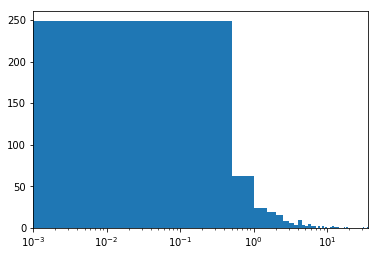

In [6]:
#plt.hist(data['precip'], bins=np.arange(0.01,0.2,0.01))
#plt.xlim([0.01,0.21])
(n, bins, patches) = plt.hist(data['precip'], bins=np.arange(0.001,36.001,0.5))
plt.xlim([0.001,36.001])
#plt.hist(data['precip'], bins=np.arange(15,35,3))
plt.xscale('log')
plt.show()
bin_centers = bins[0:71] + 0.25
#bin_centers
#print(a)

In [7]:
sums = n*bin_centers
sums

array([62.499, 47.313, 30.024, 33.269, 36.016, 22.008, 19.506, 15.004,
       42.51 , 19.004, 15.753, 28.755, 18.753, 20.253,  0.   , 15.502,
        0.   , 26.253,  0.   ,  9.751,  0.   ,  0.   , 11.251, 23.502,
       24.502, 12.751, 13.251, 13.751, 14.251,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   , 17.251,  0.   , 18.251, 18.751,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   , 21.751,  0.   ,  0.   , 23.251,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , 31.251,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , 35.251])

In [8]:
sums.cumsum()

array([ 62.499, 109.812, 139.836, 173.105, 209.121, 231.129, 250.635,
       265.639, 308.149, 327.153, 342.906, 371.661, 390.414, 410.667,
       410.667, 426.169, 426.169, 452.422, 452.422, 462.173, 462.173,
       462.173, 473.424, 496.926, 521.428, 534.179, 547.43 , 561.181,
       575.432, 575.432, 575.432, 575.432, 575.432, 575.432, 592.683,
       592.683, 610.934, 629.685, 629.685, 629.685, 629.685, 629.685,
       629.685, 651.436, 651.436, 651.436, 674.687, 674.687, 674.687,
       674.687, 674.687, 674.687, 674.687, 674.687, 674.687, 674.687,
       674.687, 674.687, 674.687, 674.687, 674.687, 674.687, 705.938,
       705.938, 705.938, 705.938, 705.938, 705.938, 705.938, 705.938,
       741.189])

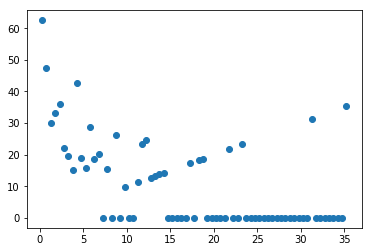

In [9]:
plt.scatter(x=bin_centers, y=sums)

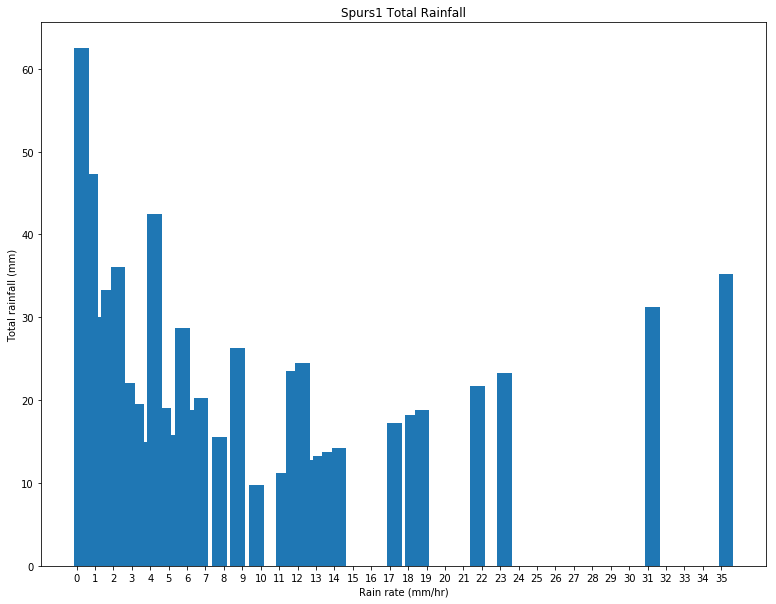

In [10]:
_, ax = plt.subplots(figsize=(13,10))
plt.bar(x=bin_centers, height=sums)
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('Spurs1 Total Rainfall')
plt.xticks(np.arange(0,36,1));

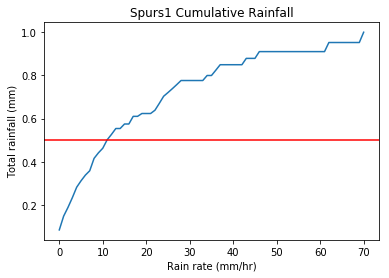

In [11]:
fullsum = sums.cumsum()/sums.sum()
halfsum = (sums.cumsum()/sums.sum())[:36]
plt.plot(fullsum)
plt.axhline(y=.5, color='r')
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('Spurs1 Cumulative Rainfall');

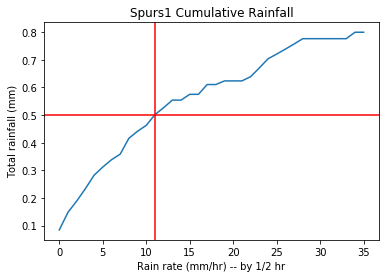

In [12]:
plt.plot(halfsum)
plt.axhline(y=.5, color='r')
plt.axvline(x=11, color='r')
plt.xlabel('Rain rate (mm/hr) -- by 1/2 hr')
plt.ylabel('Total rainfall (mm)')
plt.title('Spurs1 Cumulative Rainfall');

So we can see that the 50/50 split of rainfall occurs around to 5.5 millimeters/hr; half of all rainfall occurs below that margin.

## Lagged Time Variables

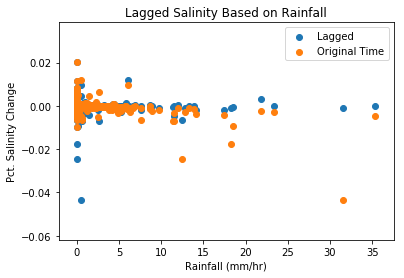

In [13]:
rainlag = data['precip'].reset_index().drop('new_time', axis=1)
pct_lag = data['pct_change'].reset_index().drop('new_time', axis=1).shift(1).fillna(0)
#lagged = pd.DataFrame(rainlag, pct_lag)
#pct_lag
plt.scatter(x=rainlag, y=pct_lag, label='Lagged')
plt.scatter(x=data['precip'], y=data['pct_change'], label='Original Time')
plt.title('Lagged Salinity Based on Rainfall')
plt.ylabel('Pct. Salinity Change')
plt.xlabel('Rainfall (mm/hr)')
plt.legend()
plt.show()

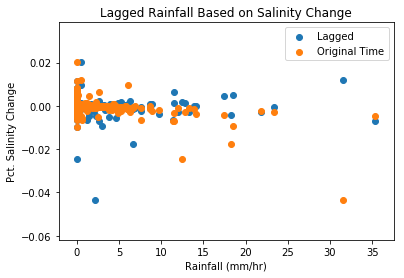

In [14]:
rainlag = pd.DataFrame(data['precip'].reset_index().drop('new_time', axis=1).shift(1).fillna(0))
pct_lag = pd.DataFrame(data['pct_change'].reset_index().drop('new_time', axis=1))
newlagged = pd.concat([rainlag, pct_lag], axis=1, join='outer')
#pct_lag
plt.scatter(x=rainlag, y=pct_lag, label='Lagged')
plt.scatter(x=data['precip'], y=data['pct_change'], label='Original Time')
plt.title('Lagged Rainfall Based on Salinity Change')
plt.ylabel('Pct. Salinity Change')
plt.xlabel('Rainfall (mm/hr)')
plt.legend()
plt.show()

In [15]:
#The lagged on salinity set -- did rain cause change
lagged = pd.concat([rainlag, pct_lag], axis=1, join='outer')
lagged.corr()

,precip,pct_change
precip,1.00000,-0.03958
pct_change,-0.03958,1.00000


In [16]:
## Lagged on Rainfall-- did salinity cause precip
newlagged.corr()

,precip,pct_change
precip,1.00000,-0.03958
pct_change,-0.03958,1.00000


In [17]:
## The unaltered original set
data[['precip', 'pct_change']].corr()

,precip,pct_change
precip,1.00000,-0.49476
pct_change,-0.49476,1.00000


In [18]:
## Only when rain occurred...
rain = data[data['precip'] > 0]

rain[['precip', 'pct_change']].corr()

,precip,pct_change
precip,1.000000,-0.585121
pct_change,-0.585121,1.000000


So for Spurs1, we can conclude that the greatest effect that occurs with percent change in salinity and rainfall is 

a) when rainfall is present, and 

b)within the same hour that it occurs

## Other Possible Correlations?

In [19]:
## We can see that, directly, no variable has a strong correlation with rainfall here
data.corr().sort_values(by='precip', ascending=True)

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,...,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
pct_change,0.002173,0.123316,0.005419,0.017342,0.000020,-0.494760,-0.186965,-0.018409,0.001891,-0.000643,...,0.004359,0.123316,0.000020,0.017342,0.005419,1.000000,1.000000,0.150344,-0.003384,-0.000208
pct_c_scaled,0.002173,0.123316,0.005419,0.017342,0.000020,-0.494760,-0.186965,-0.018409,0.001891,-0.000643,...,0.004358,0.123316,0.000020,0.017342,0.005419,1.000000,1.000000,0.150344,-0.003384,-0.000208
sss,-0.490410,1.000000,0.411407,0.128199,0.067080,-0.146640,-0.205460,-0.189729,-0.582284,0.413149,...,0.005961,1.000000,0.067080,0.128199,0.411407,0.123316,0.123316,-0.002574,0.000784,-0.024227
scaled_sss,-0.490410,1.000000,0.411407,0.128199,0.067080,-0.146640,-0.205460,-0.189729,-0.582284,0.413149,...,0.005961,1.000000,0.067080,0.128199,0.411407,0.123316,0.123316,-0.002574,0.000784,-0.024227
sst_pct_change,0.017023,-0.002574,0.020228,-0.065783,0.051786,-0.078119,-0.049622,-0.008179,0.015436,-0.006962,...,-0.013393,-0.002574,0.051786,-0.065783,0.020228,0.150344,0.150344,1.000000,0.007051,0.019055
time,1.000000,-0.490410,-0.028141,-0.081938,-0.165012,-0.054599,-0.079178,-0.102178,0.781248,-0.180050,...,-0.000321,-0.490410,-0.165012,-0.081938,-0.028141,0.002173,0.002173,0.017023,-0.016946,-0.012835
year,0.781248,-0.582284,-0.451809,-0.183468,-0.077554,-0.032837,-0.047648,-0.061545,1.000000,-0.752442,...,-0.001676,-0.582284,-0.077554,-0.183468,-0.451809,0.001891,0.001891,0.015436,-0.000591,-0.001091
hour,-0.000321,0.005961,0.039154,0.003517,-0.057326,-0.020887,-0.031171,-0.033088,-0.001676,-0.000302,...,1.000000,0.005961,-0.057326,0.003517,0.039154,0.004359,0.004358,-0.013393,0.002039,0.010116
dir_pct_change,-0.016946,0.000784,-0.025444,0.010975,-0.023398,-0.010222,0.000680,0.000494,-0.000591,-0.017146,...,0.002039,0.000784,-0.023398,0.010975,-0.025444,-0.003384,-0.003384,0.007051,1.000000,-0.013428
month,-0.180050,0.413149,0.680423,0.217663,-0.059145,-0.007835,-0.011065,-0.014113,-0.752442,1.000000,...,-0.000302,0.413149,-0.059145,0.217663,0.680423,-0.000643,-0.000643,-0.006962,-0.017146,-0.014330


In [20]:
rain_prev = data['precip'].reset_index().drop('new_time', axis=1).shift(-1).fillna(0)
data_prev = data.reset_index().drop(['new_time', 'precip'], axis=1)
data_prev = pd.concat([rain_prev,data_prev], axis=1, join='outer')


rain_lagged = data['precip'].reset_index().drop('new_time', axis=1).shift(1).fillna(0)
data_lagged = data.reset_index().drop(['new_time', 'precip'], axis=1)
data_lagged = pd.concat([rain_lagged,data_lagged], axis=1, join='outer')
data_lagged.head()

,precip,time,sss,sst,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,set,sst_pct_change,dir_pct_change,spd_pct_change
0,0.0,735126.854167,37.768217,27.886503,3.171527,-70.402566,0.0,0.0,2012,9,...,2.845093,-0.223661,-1.120622,2.145583,0.000000,0.000000,Spurs1,0.000000,0.000000,0.000000
1,0.0,735126.895833,37.767291,27.794171,3.511590,-78.652231,0.0,0.0,2012,9,...,2.836748,-0.285520,-0.968037,2.081695,-0.000025,-0.031722,Spurs1,-1.374910,0.135314,0.293850
2,0.0,735126.937500,37.767912,27.717789,4.870495,-86.660419,0.0,0.0,2012,9,...,2.842343,-0.345568,-0.358302,2.028844,0.000016,0.022122,Spurs1,-1.141199,0.126846,1.265220
3,0.0,735126.979167,37.768554,27.650786,4.511677,-89.874044,0.0,0.0,2012,9,...,2.848125,-0.369664,-0.519302,1.982482,0.000017,0.022846,Spurs1,-1.003867,0.091158,-0.334265
4,0.0,735127.020833,37.770119,27.593085,4.318494,-94.403915,0.0,0.0,2012,9,...,2.862229,-0.403631,-0.605983,1.942557,0.000041,0.054988,Spurs1,-0.866609,0.098501,-0.227134


In [51]:
data_prev.corr().sort_values(by='precip', ascending=True)

,precip,time,sss,sst,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
time,-0.054632,1.000000,-0.490410,-0.028141,-0.081938,-0.165012,-0.079178,-0.102178,0.781248,-0.180050,...,-0.000321,-0.490410,-0.165012,-0.081938,-0.028141,0.002173,0.002173,0.017023,-0.016946,-0.012835
pct_change,-0.039988,0.002173,0.123316,0.005419,0.017342,0.000020,-0.186965,-0.018409,0.001891,-0.000643,...,0.004359,0.123316,0.000020,0.017342,0.005419,1.000000,1.000000,0.150344,-0.003384,-0.000208
pct_c_scaled,-0.039988,0.002173,0.123316,0.005419,0.017342,0.000020,-0.186965,-0.018409,0.001891,-0.000643,...,0.004358,0.123316,0.000020,0.017342,0.005419,1.000000,1.000000,0.150344,-0.003384,-0.000208
year,-0.032837,0.781248,-0.582284,-0.451809,-0.183468,-0.077554,-0.047648,-0.061545,1.000000,-0.752442,...,-0.001676,-0.582284,-0.077554,-0.183468,-0.451809,0.001891,0.001891,0.015436,-0.000591,-0.001091
sst_pct_change,-0.030941,0.017023,-0.002574,0.020228,-0.065783,0.051786,-0.049622,-0.008179,0.015436,-0.006962,...,-0.013393,-0.002574,0.051786,-0.065783,0.020228,0.150344,0.150344,1.000000,0.007051,0.019055
sss,-0.019701,-0.490410,1.000000,0.411407,0.128199,0.067080,-0.205460,-0.189729,-0.582284,0.413149,...,0.005961,1.000000,0.067080,0.128199,0.411407,0.123316,0.123316,-0.002574,0.000784,-0.024227
scaled_sss,-0.019701,-0.490410,1.000000,0.411407,0.128199,0.067080,-0.205460,-0.189729,-0.582284,0.413149,...,0.005961,1.000000,0.067080,0.128199,0.411407,0.123316,0.123316,-0.002574,0.000784,-0.024227
hour,-0.011717,-0.000321,0.005961,0.039154,0.003517,-0.057326,-0.031171,-0.033088,-0.001676,-0.000302,...,1.000000,0.005961,-0.057326,0.003517,0.039154,0.004359,0.004358,-0.013393,0.002039,0.010116
month,-0.007908,-0.180050,0.413149,0.680423,0.217663,-0.059145,-0.011065,-0.014113,-0.752442,1.000000,...,-0.000302,0.413149,-0.059145,0.217663,0.680423,-0.000643,-0.000643,-0.006962,-0.017146,-0.014330
scaled_sst,-0.003057,-0.028141,0.411407,1.000000,0.005372,-0.136030,-0.010484,-0.011724,-0.451809,0.680423,...,0.039154,0.411407,-0.136030,0.005372,1.000000,0.005419,0.005419,0.020228,-0.025444,0.009284


In [23]:
data_lagged.corr().sort_values(by='precip', ascending=True)

,precip,time,sss,sst,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
sss,-0.157563,-0.490410,1.000000,0.411407,0.128199,0.067080,-0.205460,-0.189729,-0.582284,0.413149,...,0.005961,1.000000,0.067080,0.128199,0.411407,0.123316,0.123316,-0.002574,0.000784,-0.024227
scaled_sss,-0.157563,-0.490410,1.000000,0.411407,0.128199,0.067080,-0.205460,-0.189729,-0.582284,0.413149,...,0.005961,1.000000,0.067080,0.128199,0.411407,0.123316,0.123316,-0.002574,0.000784,-0.024227
time,-0.054566,1.000000,-0.490410,-0.028141,-0.081938,-0.165012,-0.079178,-0.102178,0.781248,-0.180050,...,-0.000321,-0.490410,-0.165012,-0.081938,-0.028141,0.002173,0.002173,0.017023,-0.016946,-0.012835
pct_change,-0.039580,0.002173,0.123316,0.005419,0.017342,0.000020,-0.186965,-0.018409,0.001891,-0.000643,...,0.004359,0.123316,0.000020,0.017342,0.005419,1.000000,1.000000,0.150344,-0.003384,-0.000208
pct_c_scaled,-0.039580,0.002173,0.123316,0.005419,0.017342,0.000020,-0.186965,-0.018409,0.001891,-0.000643,...,0.004358,0.123316,0.000020,0.017342,0.005419,1.000000,1.000000,0.150344,-0.003384,-0.000208
year,-0.032837,0.781248,-0.582284,-0.451809,-0.183468,-0.077554,-0.047648,-0.061545,1.000000,-0.752442,...,-0.001676,-0.582284,-0.077554,-0.183468,-0.451809,0.001891,0.001891,0.015436,-0.000591,-0.001091
sst_pct_change,-0.032643,0.017023,-0.002574,0.020228,-0.065783,0.051786,-0.049622,-0.008179,0.015436,-0.006962,...,-0.013393,-0.002574,0.051786,-0.065783,0.020228,0.150344,0.150344,1.000000,0.007051,0.019055
hour,-0.025757,-0.000321,0.005961,0.039154,0.003517,-0.057326,-0.031171,-0.033088,-0.001676,-0.000302,...,1.000000,0.005961,-0.057326,0.003517,0.039154,0.004359,0.004358,-0.013393,0.002039,0.010116
sst,-0.007781,-0.028141,0.411407,1.000000,0.005372,-0.136030,-0.010484,-0.011724,-0.451809,0.680423,...,0.039154,0.411407,-0.136030,0.005372,1.000000,0.005419,0.005419,0.020228,-0.025444,0.009284
scaled_sst,-0.007781,-0.028141,0.411407,1.000000,0.005372,-0.136030,-0.010484,-0.011724,-0.451809,0.680423,...,0.039154,0.411407,-0.136030,0.005372,1.000000,0.005419,0.005419,0.020228,-0.025444,0.009284


So every correlation is much worse when we try to lag rainfall by an hour... doesn't appear as if each variable, nor the change in them, have much effect. It is even worse when we try to see if rain has a casual effect on any other variable.

## Only Rain Events That Changed Salinity?

In [44]:
wishful_thinking = data[(data['precip'] > 1e-4) & (data['pct_change'] < 0)]
wishful_thinking

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,...,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,set,sst_pct_change,dir_pct_change,spd_pct_change
new_time,,,,,,,,,,,,,,,,,,,,,
2012-09-23 04:30:00.000000000,735135.187500,37.596840,27.444979,7.368190,-140.730838,0.773307,0.773307,0.773307,2012,9,...,1.301337,-0.751004,0.762403,1.840076,-3.048259e-04,-0.400049,Spurs1,-0.109685,0.038141,0.178607
2012-09-23 23:30:00.000028800,735135.979167,37.673946,27.457512,6.488239,-173.018242,0.904011,0.904011,0.904011,2012,9,...,1.995909,-0.993105,0.367572,1.848748,-2.508697e-04,-0.329147,Spurs1,-0.336891,0.100233,-0.194550
2012-09-24 02:30:00.000028800,735136.104167,37.666103,27.426378,6.301143,-138.351357,0.489207,0.489207,1.393218,2012,9,...,1.925260,-0.733162,0.283623,1.827206,-1.286679e-04,-0.168566,Spurs1,-0.156590,0.023876,-0.059006
2012-09-25 10:30:00.000000000,735137.437500,37.566335,27.242192,0.481440,87.184417,3.766850,3.774213,3.774213,2012,9,...,1.026555,0.957975,-2.327652,1.699761,-2.092344e-03,-2.748967,Spurs1,-0.682966,-0.106861,-2.885735
2012-09-25 11:30:00.000028800,735137.479167,37.380579,27.164036,2.491036,93.226520,2.468046,6.242260,6.242260,2012,9,...,-0.646719,1.003280,-1.425955,1.645682,-4.944742e-03,-6.497209,Spurs1,-1.191365,0.108921,14.415179
2012-09-25 18:29:59.999971200,735137.770833,37.413277,27.674026,4.398114,-133.725567,4.419203,4.419203,4.419203,2012,9,...,-0.352176,-0.698477,-0.570258,1.998563,-1.221464e-03,-1.604573,Spurs1,-3.689972,-0.896109,3.896083
2012-09-25 23:30:00.000028800,735137.979167,37.408310,27.250848,4.332133,-137.227691,2.150114,2.150114,6.569316,2012,9,...,-0.396921,-0.724737,-0.599863,1.705750,-1.097659e-03,-1.441884,Spurs1,-3.417893,-0.057194,-0.023114
2012-09-26 00:29:59.999971200,735138.020833,35.779951,26.775896,2.586057,-129.164571,31.498263,33.648376,33.648376,2012,9,...,-15.065049,-0.664277,-1.383320,1.377113,-4.352935e-02,-57.199954,Spurs1,-7.236609,0.038322,-1.477955
2012-09-26 06:29:59.999971200,735138.270833,37.361535,27.203058,4.718184,-10.870177,21.805598,21.805598,28.832958,2012,9,...,-0.818265,0.222731,-0.426643,1.672682,-2.283161e-03,-2.999713,Spurs1,0.446147,-0.530651,0.992015


In [45]:
more_wishful_thinking = data_lagged[(data_lagged['precip'] > 1e-4) & (data_lagged['pct_change'] < 0)]
more_wishful_thinking

,precip,time,sss,sst,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,set,sst_pct_change,dir_pct_change,spd_pct_change
220,0.904011,735136.020833,37.671240,27.444786,5.304733,-176.023607,0.904011,0.904011,2012,9,...,1.971534,-1.015640,-0.163462,1.839943,-7.182463e-05,-0.093870,Spurs1,-0.192630,0.080291,-0.711823
254,0.007363,735137.437500,37.566335,27.242192,0.481440,87.184417,3.774213,3.774213,2012,9,...,1.026555,0.957975,-2.327652,1.699761,-2.092344e-03,-2.748967,Spurs1,-0.682966,-0.106861,-2.885735
255,3.766850,735137.479167,37.380579,27.164036,2.491036,93.226520,6.242260,6.242260,2012,9,...,-0.646719,1.003280,-1.425955,1.645682,-4.944742e-03,-6.497209,Spurs1,-1.191365,0.108921,14.415179
263,4.419203,735137.812500,37.383024,27.484954,3.671207,-164.445360,4.419203,4.419203,2012,9,...,-0.624696,-0.928823,-0.896418,1.867737,-8.086269e-04,-1.062077,Spurs1,-2.836871,0.197359,-0.652341
268,2.150114,735138.020833,35.779951,26.775896,2.586057,-129.164571,33.648376,33.648376,2012,9,...,-15.065049,-0.664277,-1.383320,1.377113,-4.352935e-02,-57.199954,Spurs1,-7.236609,0.038322,-1.477955
275,21.805598,735138.312500,37.253655,27.153605,1.291647,81.435379,21.805598,28.287033,2012,9,...,-1.790042,0.914867,-1.964116,1.638464,-2.887471e-03,-3.793817,Spurs1,-0.754995,-4.610651,-2.600144
277,0.269411,735138.395833,37.040535,26.930026,0.849258,40.704551,17.758480,39.564078,2012,9,...,-3.709808,0.609454,-2.162614,1.483761,-4.019966e-03,-5.281991,Spurs1,-1.433742,-0.793362,-2.329977
279,1.420564,735138.479167,37.038911,26.879510,3.213341,-141.489096,19.440171,41.515180,2012,9,...,-3.724437,-0.756690,-1.101860,1.448808,-4.580425e-03,-6.018472,Spurs1,-1.702276,0.163966,17.104018
280,0.530539,735138.520833,37.016396,26.856301,5.585982,-119.959926,1.951102,19.709583,2012,9,...,-3.927252,-0.595258,-0.037266,1.432749,-6.078795e-04,-0.798282,Spurs1,-0.358692,-0.013171,2.485350
298,1.985584,735139.270833,37.361392,27.109061,2.282771,71.868765,3.220001,3.220001,2012,9,...,-0.819556,0.843133,-1.519403,1.607642,-2.232980e-03,-2.933772,Spurs1,-0.939121,-0.243637,-1.065911


In [46]:
last_one = data_prev[(data_prev['precip'] > 1e-4) & (data_prev['pct_change'] < 0)]
last_one

,precip,time,sss,sst,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,set,sst_pct_change,dir_pct_change,spd_pct_change
199,0.773307,735135.145833,37.608304,27.452218,6.860292,-149.568359,0.000000e+00,0.000000e+00,2012,9,...,1.404604,-0.817271,0.534511,1.845086,-0.000028,-0.036661,Spurs1,-0.011426,0.185754,0.503552
218,0.904011,735135.937500,37.683400,27.479796,6.712672,-164.225116,0.000000e+00,0.000000e+00,2012,9,...,2.081066,-0.927172,0.468274,1.864168,-0.000488,-0.641285,Spurs1,-0.670332,0.081326,-0.313554
221,0.489207,735136.062500,37.670950,27.436713,6.266038,-151.197296,9.040106e-01,9.040106e-01,2012,9,...,1.968922,-0.829485,0.267872,1.834357,-0.000008,-0.009602,Spurs1,-0.122319,-0.007039,0.550770
254,2.468046,735137.437500,37.566335,27.242192,0.481440,87.184417,3.774213e+00,3.774213e+00,2012,9,...,1.026555,0.957975,-2.327652,1.699761,-0.002092,-2.748967,Spurs1,-0.682966,-0.106861,-2.885735
266,2.150114,735137.937500,37.449417,27.477025,4.264166,-178.685534,-8.881784e-16,4.419203e+00,2012,9,...,-0.026635,-1.035600,-0.630359,1.862250,-0.000713,-0.936321,Spurs1,-1.869836,0.074966,1.452030
267,31.498263,735137.979167,37.408310,27.250848,4.332133,-137.227691,2.150114e+00,6.569316e+00,2012,9,...,-0.396921,-0.724737,-0.599863,1.705750,-0.001098,-1.441884,Spurs1,-3.417893,-0.057194,-0.023114
268,0.545924,735138.020833,35.779951,26.775896,2.586057,-129.164571,3.364838e+01,3.364838e+01,2012,9,...,-15.065049,-0.664277,-1.383320,1.377113,-0.043529,-57.199954,Spurs1,-7.236609,0.038322,-1.477955
275,0.269411,735138.312500,37.253655,27.153605,1.291647,81.435379,2.180560e+01,2.828703e+01,2012,9,...,-1.790042,0.914867,-1.964116,1.638464,-0.002887,-3.793817,Spurs1,-0.754995,-4.610651,-2.600144
276,17.489069,735138.354167,37.190038,27.023329,2.415636,-71.742845,2.207501e+01,2.253904e+01,2012,9,...,-2.363100,-0.233711,-1.459787,1.548321,-0.001708,-2.243485,Spurs1,-1.992202,-0.966253,2.943084
277,1.420564,735138.395833,37.040535,26.930026,0.849258,40.704551,1.775848e+01,3.956408e+01,2012,9,...,-3.709808,0.609454,-2.162614,1.483761,-0.004020,-5.281991,Spurs1,-1.433742,-0.793362,-2.329977


So, looking at the statistical differences between the three sets (original, lagged w/ rain, not lagged)

In [27]:
data.describe()

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,...,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
count,9133.000000,9133.000000,9133.000000,9133.000000,9133.000000,9133.000000,9.133000e+03,9.133000e+03,9133.000000,9133.000000,...,9133.000000,9.133000e+03,9.133000e+03,9.133000e+03,9.133000e+03,9.133000e+03,9.133000e+03,9.133000e+03,9.133000e+03,9.133000e+03
mean,735317.104167,37.452374,24.785667,5.669037,-40.574359,0.077950,2.338511e-01,4.677022e-01,2012.715756,6.627067,...,11.496989,4.356771e-17,-6.223959e-18,6.223959e-17,1.493750e-15,-3.897764e-07,3.306478e-18,-1.166992e-18,-3.889974e-18,-1.555990e-18
std,109.858931,0.111020,1.445297,2.228804,133.370699,0.889278,1.838534e+00,2.846768e+00,0.451078,3.412215,...,6.925319,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,7.609964e-04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,735126.854167,35.779951,22.538164,0.074492,-179.996089,0.000000,-8.881784e-16,-1.111611e-14,2012.000000,1.000000,...,0.000000,-1.506505e+01,-1.045427e+00,-2.510248e+00,-1.555131e+00,-4.352935e-02,-5.719995e+01,-1.307454e+01,-5.683598e+01,-3.256417e+00
25%,735221.979167,37.397080,23.514452,4.142106,-160.589457,0.000000,3.552714e-15,-7.049916e-15,2012.000000,4.000000,...,5.000000,-4.980778e-01,-8.999103e-01,-6.851273e-01,-8.796012e-01,-3.409598e-05,-4.429214e-02,-2.355221e-01,4.519201e-02,-2.714331e-01
50%,735317.104167,37.443125,24.405348,5.821573,-112.732046,0.000000,5.995204e-15,-6.217249e-15,2013.000000,7.000000,...,11.000000,-8.331470e-02,-5.410607e-01,6.844235e-02,-2.631571e-01,4.032885e-06,5.811728e-03,-6.153411e-02,6.812273e-02,-8.814773e-02
75%,735412.229167,37.522721,26.071212,7.255449,91.897439,0.000000,6.217249e-15,1.243450e-14,2013.000000,9.000000,...,18.000000,6.336848e-01,9.933145e-01,7.118160e-01,8.895163e-01,4.505486e-05,5.971734e-02,1.629043e-01,8.688784e-02,1.212322e-01
max,735507.354167,37.815080,30.004906,15.389553,179.993404,35.374674,4.956424e+01,5.178967e+01,2013.000000,12.000000,...,23.000000,3.267231e+00,1.653885e+00,4.361553e+00,3.611385e+00,2.022166e-02,2.657312e+01,1.587474e+01,2.512226e+01,3.109118e+01


In [28]:
wishful_thinking.describe()

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,...,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,...,301.000000,301.000000,301.000000,301.000000,301.000000,3.010000e+02,301.000000,301.000000,301.000000,301.000000
mean,735271.421442,37.442006,24.655993,6.453931,-0.785787,2.134034,3.463725,4.193346,2012.574751,6.797342,...,11.049834,-0.093391,0.298347,0.352178,-0.089727,-8.275031e-04,-1.086882,-0.295370,-0.045977,0.092281
std,100.783066,0.173116,1.343645,2.373467,124.918019,4.377275,6.562534,7.626976,0.495204,4.185944,...,7.303025,1.559417,0.936674,1.064964,0.929718,3.237300e-03,4.254028,0.840029,2.434385,1.819697
min,735135.187500,35.779951,22.733989,0.168562,-178.963260,0.000193,0.000193,0.000193,2012.000000,1.000000,...,0.000000,-15.065049,-1.037683,-2.468039,-1.419632,-4.352935e-02,-57.199954,-7.236609,-25.351279,-3.221535
25%,735192.312500,37.403358,23.497908,5.150638,-147.764344,0.129625,0.190002,0.260304,2012.000000,2.000000,...,5.000000,-0.441528,-0.803744,-0.232603,-0.891049,-4.134458e-04,-0.542783,-0.291253,-0.057194,-0.409050
50%,735248.604167,37.444066,24.193341,6.769012,35.692515,0.534696,0.770566,1.023918,2013.000000,9.000000,...,10.000000,-0.074830,0.571873,0.493554,-0.409853,-1.281258e-04,-0.167854,-0.135657,0.062119,-0.108413
75%,735322.270833,37.561432,25.966644,8.127077,101.115903,2.033885,3.509128,4.044662,2013.000000,11.000000,...,18.000000,0.982387,1.062437,1.102912,0.817161,-4.465619e-05,-0.058169,-0.049132,0.100600,0.194131
max,735499.854167,37.673946,27.789962,11.859325,179.879731,35.374674,49.159673,49.159673,2013.000000,12.000000,...,23.000000,1.995909,1.653033,2.777555,2.078783,-1.644206e-08,0.000491,4.166246,25.122256,17.104018


In [29]:
more_wishful_thinking.describe()

,precip,time,sss,sst,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,2.080000e+02,208.000000,208.000000,208.000000,208.000000
mean,1.886087,735280.454127,37.412903,24.650092,6.309193,-0.321616,4.274131,5.263907,2012.605769,6.725962,...,9.937500,-0.355545,0.301828,0.287235,-0.093810,-1.063521e-03,-1.397025,-0.347145,0.055582,0.065320
std,4.201274,104.753602,0.203842,1.346045,2.492369,125.850823,7.628530,8.965854,0.489864,4.093933,...,7.086146,1.836190,0.943668,1.118315,0.931379,3.848555e-03,5.057257,0.893741,2.706204,1.970343
min,0.000193,735136.020833,35.779951,22.733989,0.481440,-177.773152,0.033381,0.033381,2012.000000,1.000000,...,0.000000,-15.065049,-1.028759,-2.327652,-1.419632,-4.352935e-02,-57.199954,-7.236609,-25.351279,-3.055277
25%,0.096098,735200.677083,37.372707,23.485773,5.037889,-149.443459,0.208620,0.272344,2012.000000,2.000000,...,4.000000,-0.717633,-0.816334,-0.283194,-0.899445,-4.551379e-04,-0.597569,-0.424936,-0.010571,-0.455003
50%,0.279955,735250.687500,37.432192,24.183856,6.686815,35.103693,0.866691,1.255205,2013.000000,8.000000,...,9.000000,-0.181798,0.567457,0.456673,-0.416416,-1.318325e-04,-0.172724,-0.193676,0.069009,-0.079468
75%,1.679150,735348.197917,37.538516,25.993130,8.038170,112.363143,4.344946,4.915794,2013.000000,11.000000,...,15.000000,0.775964,1.146773,1.063019,0.835488,-3.182789e-05,-0.041312,-0.049235,0.109386,0.260120
max,35.374674,735499.895833,37.671240,27.734013,11.330720,179.852497,49.159673,49.159673,2013.000000,12.000000,...,23.000000,1.971534,1.652829,2.540373,2.040070,-7.015076e-07,-0.000410,4.560293,25.122256,17.104018


In [30]:
last_one.describe()

,precip,time,sss,sst,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,2.400000e+02,2.400000e+02,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,2.400000e+02,240.000000,240.000000,240.000000,240.000000
mean,1.954784,735273.350347,37.452140,24.592736,6.534301,-12.107681,2.908478e+00,3.595940e+00,2012.583333,6.741667,...,11.108333,-0.002106,0.213452,0.388240,-0.133496,-6.168294e-04,-0.810043,-0.287617,0.055791,0.079275
std,4.263061,100.066004,0.155775,1.322508,2.247197,123.289341,6.648127e+00,7.583798e+00,0.494037,4.261329,...,7.408347,1.403211,0.924462,1.008307,0.915092,3.007651e-03,3.952255,0.964068,2.249501,1.494246
min,0.000193,735135.145833,35.779951,22.733989,0.481440,-179.975094,-8.881784e-16,-1.111611e-14,2012.000000,1.000000,...,0.000000,-15.065049,-1.045270,-2.327652,-1.419632,-4.352935e-02,-57.199954,-7.236609,-14.798714,-2.885735
25%,0.111086,735201.104167,37.417386,23.484728,5.355817,-155.975901,5.329071e-15,1.093938e-14,2012.000000,2.000000,...,5.000000,-0.315169,-0.865316,-0.140541,-0.900169,-2.618595e-04,-0.343589,-0.271766,-0.022296,-0.365024
50%,0.489599,735248.958333,37.448408,24.188397,6.792006,24.208401,1.458900e-01,2.308476e-01,2013.000000,9.000000,...,10.000000,-0.035721,0.485761,0.503871,-0.413273,-7.891873e-05,-0.103192,-0.116847,0.065249,-0.126023
75%,1.818869,735305.833333,37.552876,25.992483,8.073941,86.717950,2.249031e+00,3.225886e+00,2013.000000,11.000000,...,18.000000,0.905315,0.954477,1.079070,0.835041,-2.104187e-05,-0.027138,-0.024192,0.098510,0.213026
max,35.374674,735499.812500,37.683400,27.745753,11.859325,179.739996,4.915967e+01,4.915967e+01,2013.000000,12.000000,...,23.000000,2.081066,1.651985,2.777555,2.048193,-1.584766e-07,0.000304,4.166246,25.122256,11.635173


In [47]:
wishful_thinking.corr().sort_values(by='precip', ascending=True)

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,...,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
pct_change,0.129195,0.808903,-0.170695,0.286263,0.017150,-0.620168,-0.546377,-0.491371,0.127230,-0.067186,...,0.067346,0.808903,0.017150,0.286263,-0.170695,1.000000,1.000000,0.657436,-0.002477,-0.045346
pct_c_scaled,0.129195,0.808903,-0.170695,0.286263,0.017150,-0.620168,-0.546377,-0.491371,0.127230,-0.067186,...,0.067346,0.808903,0.017150,0.286263,-0.170695,1.000000,1.000000,0.657436,-0.002477,-0.045346
scaled_sss,-0.071633,1.000000,0.162535,0.362179,-0.003266,-0.510220,-0.526667,-0.527547,-0.215060,0.263802,...,0.061015,1.000000,-0.003266,0.362179,0.162535,0.808903,0.808903,0.569657,-0.008337,-0.098965
sss,-0.071633,1.000000,0.162535,0.362179,-0.003266,-0.510220,-0.526667,-0.527547,-0.215060,0.263802,...,0.061015,1.000000,-0.003266,0.362179,0.162535,0.808903,0.808903,0.569657,-0.008337,-0.098965
sst_pct_change,0.116752,0.569657,-0.146360,0.234378,0.018037,-0.409456,-0.416696,-0.393245,0.096251,-0.034528,...,-0.024781,0.569657,0.018037,0.234378,-0.146360,0.657436,0.657436,1.000000,-0.022687,-0.121569
wind_spd,-0.044939,0.362179,-0.064442,1.000000,0.078493,-0.145900,-0.135699,-0.163478,-0.075244,0.081640,...,-0.077033,0.362179,0.078493,1.000000,-0.064442,0.286263,0.286263,0.234378,-0.016785,0.058059
scaled_spd,-0.044939,0.362179,-0.064442,1.000000,0.078493,-0.145900,-0.135699,-0.163478,-0.075244,0.081640,...,-0.077033,0.362179,0.078493,1.000000,-0.064442,0.286263,0.286263,0.234378,-0.016785,0.058059
time,1.000000,-0.071633,-0.113386,-0.044939,-0.095862,-0.105355,-0.108069,-0.133727,0.723344,-0.228846,...,-0.010282,-0.071633,-0.095862,-0.044939,-0.113386,0.129195,0.129195,0.116752,-0.004310,-0.045314
hour,-0.010282,0.061015,-0.026372,-0.077033,0.006708,-0.066195,-0.093773,-0.072072,-0.002416,-0.006647,...,1.000000,0.061015,0.006708,-0.077033,-0.026372,0.067346,0.067346,-0.024781,-0.028376,0.082924
spd_pct_change,-0.045314,-0.098965,0.108956,0.058059,-0.024599,-0.054339,0.057321,0.121846,-0.058582,0.041562,...,0.082924,-0.098965,-0.024599,0.058059,0.108956,-0.045346,-0.045346,-0.121569,0.051864,1.000000


In [48]:
more_wishful_thinking.corr().sort_values(by='precip', ascending=True)

,precip,time,sss,sst,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
sss,-0.298398,0.023851,1.000000,0.013360,0.381798,0.035966,-0.533824,-0.541800,-0.077646,0.151692,...,0.031967,1.000000,0.035966,0.381798,0.013360,0.809690,0.809690,0.637782,-0.038112,-0.130217
scaled_sss,-0.298398,0.023851,1.000000,0.013360,0.381798,0.035966,-0.533824,-0.541800,-0.077646,0.151692,...,0.031967,1.000000,0.035966,0.381798,0.013360,0.809690,0.809690,0.637782,-0.038112,-0.130217
sst_pct_change,-0.215543,0.152498,0.637782,-0.147534,0.283598,-0.001648,-0.447374,-0.411416,0.110281,-0.014202,...,0.006175,0.637782,-0.001648,0.283598,-0.147534,0.716484,0.716484,1.000000,-0.065664,-0.015829
pct_c_scaled,-0.186435,0.185556,0.809690,-0.210433,0.305598,0.031390,-0.537943,-0.474320,0.187597,-0.099106,...,0.057197,0.809690,0.031390,0.305598,-0.210433,1.000000,1.000000,0.716484,-0.005964,-0.040423
pct_change,-0.186435,0.185556,0.809690,-0.210433,0.305598,0.031390,-0.537943,-0.474320,0.187597,-0.099106,...,0.057197,0.809690,0.031390,0.305598,-0.210433,1.000000,1.000000,0.716484,-0.005964,-0.040423
scaled_spd,-0.109258,-0.018134,0.381798,-0.151820,1.000000,0.055724,-0.198848,-0.225522,-0.053759,0.074212,...,-0.123989,0.381798,0.055724,1.000000,-0.151820,0.305598,0.305598,0.283598,-0.031007,0.088849
wind_spd,-0.109258,-0.018134,0.381798,-0.151820,1.000000,0.055724,-0.198848,-0.225522,-0.053759,0.074212,...,-0.123989,0.381798,0.055724,1.000000,-0.151820,0.305598,0.305598,0.283598,-0.031007,0.088849
month,-0.090761,-0.190851,0.151692,0.663403,0.074212,-0.092273,-0.063874,-0.091608,-0.812924,1.000000,...,-0.045888,0.151692,-0.092273,0.074212,0.663403,-0.099106,-0.099106,-0.014202,-0.087057,-0.025333
time,-0.071417,1.000000,0.023851,-0.056955,-0.018134,-0.153763,-0.137755,-0.169541,0.724754,-0.190851,...,0.116425,0.023851,-0.153763,-0.018134,-0.056955,0.185556,0.185556,0.152498,0.019701,-0.116382
hour,-0.023568,0.116425,0.031967,-0.027207,-0.123989,-0.009364,-0.046585,-0.018826,0.097245,-0.045888,...,1.000000,0.031967,-0.009364,-0.123989,-0.027207,0.057197,0.057197,0.006175,0.029457,0.025543


In [49]:
last_one.corr().sort_values(by='precip', ascending=True)

,precip,time,sss,sst,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
sst_pct_change,-0.165287,0.067562,0.535570,-0.102447,0.221631,0.011142,-0.317678,-0.303948,0.035602,0.015965,...,-0.059417,0.535570,0.011142,0.221631,-0.102447,0.541364,0.541364,1.000000,-0.062017,-0.011602
time,-0.118392,1.000000,-0.043331,-0.047428,-0.047925,-0.142871,-0.139313,-0.161183,0.705918,-0.197862,...,0.019444,-0.043331,-0.142871,-0.047925,-0.047428,0.123330,0.123330,0.067562,0.012148,0.127227
year,-0.086871,0.705918,-0.242989,-0.501195,-0.080175,-0.043073,0.017228,0.029971,1.000000,-0.832413,...,-0.056207,-0.242989,-0.043073,-0.080175,-0.501195,0.096557,0.096557,0.035602,0.079926,0.109881
sss,-0.054508,-0.043331,1.000000,0.217262,0.305601,0.005430,-0.542946,-0.541394,-0.242989,0.315196,...,0.065337,1.000000,0.005430,0.305601,0.217262,0.795457,0.795457,0.535570,-0.018873,0.008522
scaled_sss,-0.054508,-0.043331,1.000000,0.217262,0.305601,0.005430,-0.542946,-0.541394,-0.242989,0.315196,...,0.065337,1.000000,0.005430,0.305601,0.217262,0.795457,0.795457,0.535570,-0.018873,0.008522
pct_c_scaled,-0.049644,0.123330,0.795457,-0.120164,0.187284,0.018904,-0.536019,-0.483276,0.096557,-0.031767,...,0.065016,0.795457,0.018904,0.187284,-0.120164,1.000000,1.000000,0.541364,0.000260,0.078799
pct_change,-0.049644,0.123330,0.795457,-0.120164,0.187284,0.018904,-0.536019,-0.483276,0.096557,-0.031767,...,0.065016,0.795457,0.018904,0.187284,-0.120164,1.000000,1.000000,0.541364,0.000260,0.078799
wind_spd,-0.032653,-0.047925,0.305601,-0.062806,1.000000,0.090412,-0.055974,-0.099458,-0.080175,0.087911,...,-0.072875,0.305601,0.090412,1.000000,-0.062806,0.187284,0.187284,0.221631,0.060509,-0.001978
scaled_spd,-0.032653,-0.047925,0.305601,-0.062806,1.000000,0.090412,-0.055974,-0.099458,-0.080175,0.087911,...,-0.072875,0.305601,0.090412,1.000000,-0.062806,0.187284,0.187284,0.221631,0.060509,-0.001978
dir_pct_change,0.001080,0.012148,-0.018873,-0.067197,0.060509,0.003162,0.066656,0.082635,0.079926,-0.111779,...,-0.029387,-0.018873,0.003162,0.060509,-0.067197,0.000260,0.000260,-0.062017,1.000000,0.054895


So nothing gets better

I swear on my mom that everything we've done points to salinity change causing rain and not the other way around jfc

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9133 entries, 2012-09-14 20:30:00.000028800 to 2013-09-30 08:30:00.000028800
Data columns (total 22 columns):
time              9133 non-null float64
sss               9133 non-null float64
sst               9133 non-null float64
wind_spd          9133 non-null float64
wind_dir          9133 non-null float64
precip            9133 non-null float64
cum_precip3       9133 non-null float64
cum_precip6       9133 non-null float64
year              9133 non-null int64
month             9133 non-null int64
day               9133 non-null int64
hour              9133 non-null int64
scaled_sss        9133 non-null float64
scaled_dir        9133 non-null float64
scaled_spd        9133 non-null float64
scaled_sst        9133 non-null float64
pct_change        9133 non-null float64
pct_c_scaled      9133 non-null float64
set               9133 non-null object
sst_pct_change    9133 non-null float64
dir_pct_change    9133 non-null float64
spd_pct_change

In [65]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("precip ~ pct_change + scaled_sss + scaled_sst + scaled_dir + scaled_spd", data=data).fit()
print(model.params)
print(model.summary())
print(model.mse_total)

Intercept       0.077731
pct_change   -562.413571
scaled_sss     -0.103503
scaled_sst      0.045538
scaled_dir      0.047905
scaled_spd      0.030692
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 precip   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     631.5
Date:                Tue, 05 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:38:20   Log-Likelihood:                -10530.
No. Observations:                9133   AIC:                         2.107e+04
Df Residuals:                    9127   BIC:                         2.112e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t  

### Plotting this

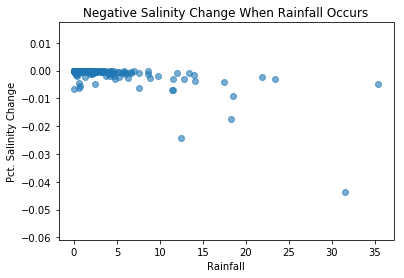

In [37]:
plt.scatter(wishful_thinking['precip'], wishful_thinking['pct_change'], alpha=0.6)
plt.title('Negative Salinity Change When Rainfall Occurs')
plt.xlabel('Rainfall')
plt.ylabel('Pct. Salinity Change');

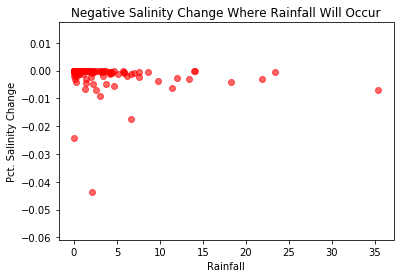

In [39]:
plt.scatter(more_wishful_thinking['precip'], more_wishful_thinking['pct_change'], c='red', alpha=0.6)
plt.title('Negative Salinity Change Where Rainfall Will Occur')
plt.xlabel('Rainfall')
plt.ylabel('Pct. Salinity Change');

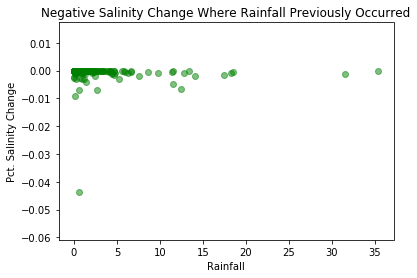

In [40]:
plt.scatter(last_one['precip'], last_one['pct_change'], c='green', alpha=0.5)
plt.title('Negative Salinity Change Where Rainfall Previously Occurred')
plt.xlabel('Rainfall')
plt.ylabel('Pct. Salinity Change');

## Specific Rain Events

In [140]:
## The events with the greatest negative salinity change...
top_change = data[(data['precip'] > 1e-4)].sort_values(by='pct_change', ascending=True)[:10]
top_change.corr().sort_values(by='precip', ascending=True).style.background_gradient('RdBu_r').set_precision(3)
#top_change

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
pct_c_scaled,0.462,0.962,-0.381,0.0652,0.496,-0.807,-0.367,-0.383,0.396,-0.0443,-0.431,0.695,0.962,0.496,0.0652,-0.381,1,1,0.97,-0.152,-0.0277
pct_change,0.462,0.962,-0.381,0.0652,0.496,-0.807,-0.367,-0.383,0.396,-0.0443,-0.431,0.695,0.962,0.496,0.0652,-0.381,1,1,0.97,-0.152,-0.0277
sst_pct_change,0.49,0.943,-0.423,0.106,0.438,-0.736,-0.35,-0.361,0.388,0.0126,-0.409,0.71,0.943,0.438,0.106,-0.423,0.97,0.97,1,-0.206,0.0547
sss,0.432,1,-0.373,0.0413,0.294,-0.712,-0.357,-0.38,0.311,0.0712,-0.363,0.627,1,0.294,0.0413,-0.373,0.962,0.962,0.943,-0.276,-0.18
scaled_sss,0.432,1,-0.373,0.0413,0.294,-0.712,-0.357,-0.38,0.311,0.0712,-0.363,0.627,1,0.294,0.0413,-0.373,0.962,0.962,0.943,-0.276,-0.18
scaled_dir,0.124,0.294,-0.231,-0.00848,1,-0.695,-0.226,-0.216,0.227,-0.241,-0.214,0.31,0.294,1,-0.00848,-0.231,0.496,0.496,0.438,0.496,0.0135
wind_dir,0.124,0.294,-0.231,-0.00848,1,-0.695,-0.226,-0.216,0.227,-0.241,-0.214,0.31,0.294,1,-0.00848,-0.231,0.496,0.496,0.438,0.496,0.0135
hour,0.34,0.627,-0.592,0.268,0.31,-0.432,-0.183,-0.192,0.233,0.0834,-0.493,1,0.627,0.31,0.268,-0.592,0.695,0.695,0.71,-0.356,0.328
time,1,0.432,0.122,-0.14,0.124,-0.392,-0.328,-0.341,0.846,-0.0932,-0.407,0.34,0.432,0.124,-0.14,0.122,0.462,0.462,0.49,0.141,0.0492
year,0.846,0.311,-0.0793,0.208,0.227,-0.324,0.0725,0.0633,1,-0.61,-0.716,0.233,0.311,0.227,0.208,-0.0793,0.396,0.396,0.388,0.396,0.185


So, for the ten most extreme (negative) changes in salinity, we see a very strong negative correlation between the change and precipitation. We also expected to see a similar strong correlation with salinity, but we were surprised to see that change in temperature was the second strongest negative correlation with precipitation here. Furthermore, it was interesting to note that wind direction and precipitation have a strong negative correlation, as well as temperature and wind speed. Finally, we were interested in the fact that all of the most extreme changes occured in the late fall/winter months (September to January)

In [142]:
low_change = data[(data['precip'] > 1e-4) & (data['pct_change'] < 0)].sort_values(by='pct_change', ascending=False)[:10]
low_change.corr().sort_values(by='precip', ascending=True).style.background_gradient('RdBu_r').set_precision(3)
#low_change

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
scaled_sst,-0.95,0.71,1,0.502,-0.152,-0.207,0.398,-0.0156,-0.813,0.776,-0.303,-0.25,0.71,-0.152,0.502,1,0.0063,0.0063,-0.651,0.373,0.741
sst,-0.95,0.71,1,0.502,-0.152,-0.207,0.398,-0.0156,-0.813,0.776,-0.303,-0.25,0.71,-0.152,0.502,1,0.0063,0.0063,-0.651,0.373,0.741
spd_pct_change,-0.668,0.288,0.741,0.239,0.0732,-0.155,0.633,0.108,-0.543,0.481,0.111,0.37,0.288,0.0732,0.239,0.741,-0.0633,-0.0633,-0.252,0.304,1
year,0.951,-0.895,-0.813,-0.67,-0.27,-0.133,-0.282,-0.226,1,-0.997,-0.111,0.354,-0.895,-0.27,-0.67,-0.813,0.123,0.123,0.679,-0.274,-0.543
scaled_spd,-0.623,0.707,0.502,1,0.116,-0.0089,-0.0026,0.0507,-0.67,0.676,0.0293,-0.255,0.707,0.116,1,0.502,-0.215,-0.215,-0.798,-0.196,0.239
wind_spd,-0.623,0.707,0.502,1,0.116,-0.0089,-0.0026,0.0507,-0.67,0.676,0.0293,-0.255,0.707,0.116,1,0.502,-0.215,-0.215,-0.798,-0.196,0.239
time,1,-0.841,-0.95,-0.623,-0.0528,0.0364,-0.376,-0.101,0.951,-0.929,0.102,0.312,-0.841,-0.0528,-0.623,-0.95,0.0323,0.0323,0.703,-0.342,-0.668
hour,0.312,-0.522,-0.25,-0.255,0.326,0.0541,0.378,-0.117,0.354,-0.393,0.36,1,-0.522,0.326,-0.255,-0.25,0.0535,0.0535,0.39,-0.305,0.37
sss,-0.841,1,0.71,0.707,0.132,0.0897,-0.0573,-0.0151,-0.895,0.916,-0.18,-0.522,1,0.132,0.707,0.71,-0.093,-0.093,-0.574,0.325,0.288
scaled_sss,-0.841,1,0.71,0.707,0.132,0.0897,-0.0573,-0.0151,-0.895,0.916,-0.18,-0.522,1,0.132,0.707,0.71,-0.093,-0.093,-0.574,0.325,0.288


In [143]:
top_rain = data[(data['precip'] > 1e-4) & (data['pct_change'] <0)].sort_values(by='precip', ascending=False)[:10]
top_rain.corr().sort_values(by='precip', ascending=True).style.background_gradient('RdBu_r').set_precision(3)
#top_rain

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
scaled_sss,0.41,1,-0.384,0.504,0.509,-0.517,-0.482,-0.411,0.39,-0.202,-0.579,0.241,1,0.509,0.504,-0.384,0.976,0.976,0.982,-0.201,0.299
sss,0.41,1,-0.384,0.504,0.509,-0.517,-0.482,-0.411,0.39,-0.202,-0.579,0.241,1,0.509,0.504,-0.384,0.976,0.976,0.982,-0.201,0.299
pct_change,0.348,0.976,-0.379,0.441,0.548,-0.485,-0.517,-0.304,0.381,-0.247,-0.503,0.31,0.976,0.548,0.441,-0.379,1,1,0.984,-0.192,0.277
pct_c_scaled,0.348,0.976,-0.379,0.441,0.548,-0.485,-0.517,-0.304,0.381,-0.247,-0.503,0.31,0.976,0.548,0.441,-0.379,1,1,0.984,-0.192,0.277
sst_pct_change,0.347,0.982,-0.338,0.459,0.497,-0.471,-0.487,-0.339,0.356,-0.211,-0.475,0.293,0.982,0.497,0.459,-0.338,0.984,0.984,1,-0.167,0.375
month,-0.23,-0.202,0.675,-0.428,-0.17,-0.436,-0.212,-0.126,-0.816,1,0.555,0.0458,-0.202,-0.17,-0.428,0.675,-0.247,-0.247,-0.211,-0.374,0.106
time,1,0.41,-0.394,0.114,-0.343,-0.305,0.138,-0.169,0.75,-0.23,-0.662,0.307,0.41,-0.343,0.114,-0.394,0.348,0.348,0.347,0.577,-0.122
spd_pct_change,-0.122,0.299,-0.199,0.602,0.41,-0.2,-0.526,-0.622,-0.14,0.106,-0.00433,0.0886,0.299,0.41,0.602,-0.199,0.277,0.277,0.375,0.111,1
scaled_spd,0.114,0.504,-0.726,1,0.673,-0.157,-0.488,-0.768,0.373,-0.428,-0.638,-0.163,0.504,0.673,1,-0.726,0.441,0.441,0.459,0.0585,0.602
wind_spd,0.114,0.504,-0.726,1,0.673,-0.157,-0.488,-0.768,0.373,-0.428,-0.638,-0.163,0.504,0.673,1,-0.726,0.441,0.441,0.459,0.0585,0.602


In [144]:
low_rain = data[(data['precip'] > 1e-4) & (data['pct_change'] < 0)].sort_values(by='precip', ascending=True)[:10]
low_rain.corr().sort_values(by='precip', ascending=True).style.background_gradient('RdBu_r').set_precision(3)
#low_rain

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
pct_c_scaled,0.302,0.849,-0.467,0.801,-0.626,-0.89,-0.924,-0.906,0.166,0.0852,-0.5,0.242,0.849,-0.626,0.801,-0.467,1,1,0.961,-0.276,0.829
pct_change,0.302,0.849,-0.467,0.801,-0.626,-0.89,-0.924,-0.906,0.166,0.0852,-0.5,0.242,0.849,-0.626,0.801,-0.467,1,1,0.961,-0.276,0.829
sst_pct_change,0.257,0.723,-0.64,0.749,-0.584,-0.842,-0.928,-0.932,0.257,-0.108,-0.405,0.18,0.723,-0.584,0.749,-0.64,0.961,0.961,1,-0.244,0.731
spd_pct_change,0.49,0.824,-0.0545,0.689,-0.588,-0.789,-0.65,-0.56,0.368,-0.0359,-0.548,0.537,0.824,-0.588,0.689,-0.0545,0.829,0.829,0.731,-0.226,1
scaled_spd,0.0335,0.839,-0.302,1,-0.557,-0.728,-0.752,-0.773,-0.0602,0.167,-0.501,0.0417,0.839,-0.557,1,-0.302,0.801,0.801,0.749,-0.467,0.689
wind_spd,0.0335,0.839,-0.302,1,-0.557,-0.728,-0.752,-0.773,-0.0602,0.167,-0.501,0.0417,0.839,-0.557,1,-0.302,0.801,0.801,0.749,-0.467,0.689
sss,0.284,1,-0.0837,0.839,-0.495,-0.675,-0.808,-0.761,0.00553,0.338,-0.788,0.0574,1,-0.495,0.839,-0.0837,0.849,0.849,0.723,-0.404,0.824
scaled_sss,0.284,1,-0.0837,0.839,-0.495,-0.675,-0.808,-0.761,0.00553,0.338,-0.788,0.0574,1,-0.495,0.839,-0.0837,0.849,0.849,0.723,-0.404,0.824
hour,0.54,0.0574,0.00828,0.0417,-0.151,-0.503,0.0021,0.112,0.523,-0.283,0.145,1,0.0574,-0.151,0.0417,0.00828,0.242,0.242,0.18,0.22,0.537
time,1,0.284,-0.164,0.0335,-0.282,-0.423,-0.361,-0.163,0.784,-0.209,-0.105,0.54,0.284,-0.282,0.0335,-0.164,0.302,0.302,0.257,0.0498,0.49


In [168]:
top_wind = data[(data['precip'] > 1e-4) & (data['pct_change'] < 0)].sort_values(by='spd_pct_change', ascending=False)[:10]
top_wind.corr().sort_values(by='precip', ascending=True).style.background_gradient('RdBu_r').set_precision(3)
#top_wind

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
pct_c_scaled,0.434,0.968,-0.336,0.54,-0.415,-0.846,-0.485,-0.342,0.362,-0.223,-0.329,0.605,0.968,-0.415,0.54,-0.336,1,1,0.518,0.0536,0.0349
pct_change,0.434,0.968,-0.336,0.54,-0.415,-0.846,-0.485,-0.342,0.362,-0.223,-0.329,0.605,0.968,-0.415,0.54,-0.336,1,1,0.518,0.0536,0.0349
scaled_sss,0.36,1,-0.253,0.569,-0.222,-0.806,-0.588,-0.493,0.285,-0.148,-0.378,0.59,1,-0.222,0.569,-0.253,0.968,0.968,0.553,0.0338,-0.0238
sss,0.36,1,-0.253,0.569,-0.222,-0.806,-0.588,-0.493,0.285,-0.148,-0.378,0.59,1,-0.222,0.569,-0.253,0.968,0.968,0.553,0.0338,-0.0238
sst_pct_change,0.268,0.553,-0.36,0.4,0.0237,-0.518,-0.167,-0.104,0.187,-0.068,-0.253,0.21,0.553,0.0237,0.4,-0.36,0.518,0.518,1,0.18,0.389
hour,0.355,0.59,-0.419,0.587,-0.413,-0.361,-0.328,-0.365,0.23,-0.11,0.158,1,0.59,-0.413,0.587,-0.419,0.605,0.605,0.21,0.316,-0.427
wind_spd,0.375,0.569,-0.335,1,-0.0817,-0.289,-0.19,-0.268,0.427,-0.407,-0.146,0.587,0.569,-0.0817,1,-0.335,0.54,0.54,0.4,0.512,-0.473
scaled_spd,0.375,0.569,-0.335,1,-0.0817,-0.289,-0.19,-0.268,0.427,-0.407,-0.146,0.587,0.569,-0.0817,1,-0.335,0.54,0.54,0.4,0.512,-0.473
time,1,0.36,-0.917,0.375,-0.125,-0.264,-0.36,-0.383,0.932,-0.748,-0.0991,0.355,0.36,-0.125,0.375,-0.917,0.434,0.434,0.268,0.17,-0.26
spd_pct_change,-0.26,-0.0238,0.243,-0.473,-0.135,-0.238,0.353,0.545,-0.255,0.202,0.187,-0.427,-0.0238,-0.135,-0.473,0.243,0.0349,0.0349,0.389,-0.221,1


In [147]:
low_wind = data[(data['precip'] > 1e-4) & (data['pct_change'] < 0)].sort_values(by='spd_pct_change', ascending=True)[:10]
low_wind.corr().sort_values(by='precip', ascending=True).style.background_gradient('RdBu_r').set_precision(3)
#low_wind

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
sst_pct_change,0.395,0.85,-0.528,-0.551,-0.0177,-0.71,-0.922,-0.717,0.739,-0.724,-0.447,-0.212,0.85,-0.0177,-0.551,-0.528,0.903,0.903,1,0.359,-0.196
scaled_sss,0.172,1,-0.396,-0.538,-0.109,-0.703,-0.917,-0.826,0.477,-0.534,-0.337,-0.0202,1,-0.109,-0.538,-0.396,0.84,0.84,0.85,0.388,-0.347
sss,0.172,1,-0.396,-0.538,-0.109,-0.703,-0.917,-0.826,0.477,-0.534,-0.337,-0.0202,1,-0.109,-0.538,-0.396,0.84,0.84,0.85,0.388,-0.347
pct_c_scaled,0.179,0.84,-0.496,-0.638,-0.00972,-0.661,-0.889,-0.602,0.503,-0.566,-0.363,0.117,0.84,-0.00972,-0.638,-0.496,1,1,0.903,0.314,-0.155
pct_change,0.179,0.84,-0.496,-0.638,-0.00972,-0.661,-0.889,-0.602,0.503,-0.566,-0.363,0.117,0.84,-0.00972,-0.638,-0.496,1,1,0.903,0.314,-0.155
year,0.736,0.477,-0.611,-0.11,-0.0757,-0.57,-0.61,-0.586,1,-0.831,-0.29,-0.457,0.477,-0.0757,-0.11,-0.611,0.503,0.503,0.739,0.276,-0.136
time,1,0.172,-0.271,-0.203,0.18,-0.494,-0.416,-0.475,0.736,-0.235,-0.0599,-0.129,0.172,0.18,-0.203,-0.271,0.179,0.179,0.395,0.476,-0.357
dir_pct_change,0.476,0.388,-0.257,-0.708,0.185,-0.264,-0.486,-0.47,0.276,-0.00678,0.0638,-0.0668,0.388,0.185,-0.708,-0.257,0.314,0.314,0.359,1,-0.61
hour,-0.129,-0.0202,-0.00231,-0.195,0.11,-0.243,-0.0351,-0.0432,-0.457,0.552,0.101,1,-0.0202,0.11,-0.195,-0.00231,0.117,0.117,-0.212,-0.0668,-0.255
wind_dir,0.18,-0.109,0.322,-0.554,1,-0.0536,0.106,0.125,-0.0757,0.221,0.668,0.11,-0.109,1,-0.554,0.322,-0.00972,-0.00972,-0.0177,0.185,-0.278


# Spurs2

## Binning Rainfall

In [277]:
print(data2['precip'].sum())
data2['precip'].describe()

3927.2051423026883


count    10459.000000
mean         0.375486
std          1.927136
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         45.403696
Name: precip, dtype: float64

In [278]:
large = data2[data2['precip'] > 15]
print('Substantive rainfall:', large['precip'].sum(), 'mm over', large['precip'].count(), 'events')
small = data2[(data2['precip'] > 0) & (data2['precip'] < .21)]
print('Marginal rainfall:', small['precip'].sum(), 'mm over', small['precip'].count(), 'events')
other = data2[(data2['precip'] > 0.21) & (data2['precip'] <= 2)]
print('Rainfall:', other['precip'].sum(), 'mm over', other['precip'].count(), 'events')

Substantive rainfall: 953.5881939600546 mm over 43 events
Marginal rainfall: 58.33822054609101 mm over 656 events
Rainfall: 546.759144875758 mm over 651 events


In [279]:
data2['precip'].sum()

3927.2051423026883

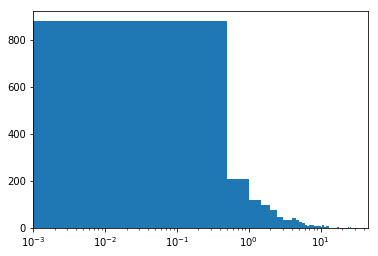

In [280]:
#plt.hist(data['precip'], bins=np.arange(0.01,0.2,0.01))
#plt.xlim([0.01,0.21])
(n, bins, patches) = plt.hist(data2['precip'], bins=np.arange(0.001,46.001,0.5))
plt.xlim([0.001,45.501])
#plt.hist(data['precip'], bins=np.arange(15,35,3))
plt.xscale('log')
plt.show()
bin_centers = bins[0:91] + 0.25
#bin_centers
#print(a)

In [281]:
sums = n*bin_centers
sums

array([221.131, 155.457, 150.12 , 171.598, 168.825, 129.297, 117.036,
       127.534, 174.291, 156.783, 141.777, 126.522,  81.263,  67.51 ,
        87.012, 100.763,  66.008,  87.51 ,  74.008,  68.257,  41.004,
       118.261,  67.506,  58.755,  85.757, 127.51 ,  26.502,  13.751,
        28.502,  29.502,  30.502,  31.502,  32.502,  33.502,  86.255,
        53.253,  18.251,  18.751,  38.502,  19.751,  40.502,  20.751,
        21.251,  21.751,   0.   ,   0.   ,  23.251,   0.   ,  72.753,
         0.   ,  25.251,  25.751,  78.753,   0.   ,   0.   ,  55.502,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,  61.502,   0.   ,
        31.751,   0.   ,  32.751,  33.251,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,  45.251])

In [282]:
bin_centers

array([ 0.251,  0.751,  1.251,  1.751,  2.251,  2.751,  3.251,  3.751,
        4.251,  4.751,  5.251,  5.751,  6.251,  6.751,  7.251,  7.751,
        8.251,  8.751,  9.251,  9.751, 10.251, 10.751, 11.251, 11.751,
       12.251, 12.751, 13.251, 13.751, 14.251, 14.751, 15.251, 15.751,
       16.251, 16.751, 17.251, 17.751, 18.251, 18.751, 19.251, 19.751,
       20.251, 20.751, 21.251, 21.751, 22.251, 22.751, 23.251, 23.751,
       24.251, 24.751, 25.251, 25.751, 26.251, 26.751, 27.251, 27.751,
       28.251, 28.751, 29.251, 29.751, 30.251, 30.751, 31.251, 31.751,
       32.251, 32.751, 33.251, 33.751, 34.251, 34.751, 35.251, 35.751,
       36.251, 36.751, 37.251, 37.751, 38.251, 38.751, 39.251, 39.751,
       40.251, 40.751, 41.251, 41.751, 42.251, 42.751, 43.251, 43.751,
       44.251, 44.751, 45.251])

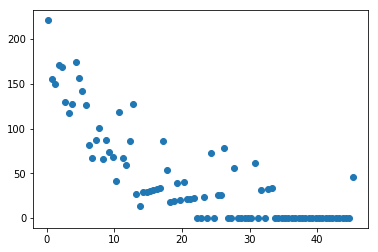

In [283]:
plt.scatter(x=bin_centers, y=sums)

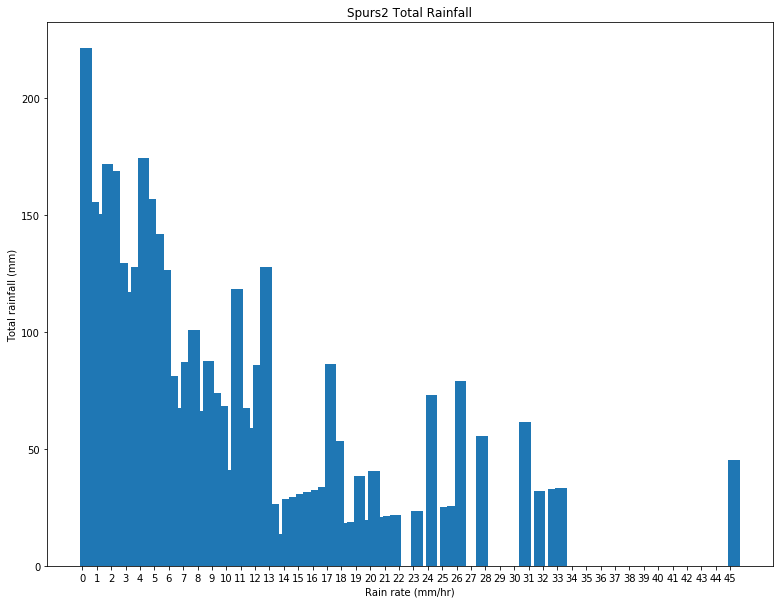

In [284]:
_, ax = plt.subplots(figsize=(13,10))
plt.bar(x=bin_centers, height=sums)
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('Spurs2 Total Rainfall')
plt.xticks(np.arange(0,46,1));

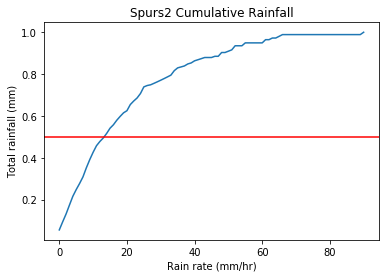

In [285]:
fullsum = sums.cumsum()/sums.sum()
halfsum = (sums.cumsum()/sums.sum())[:46]
plt.plot(fullsum)
plt.axhline(y=.5, color='r')
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('Spurs2 Cumulative Rainfall');

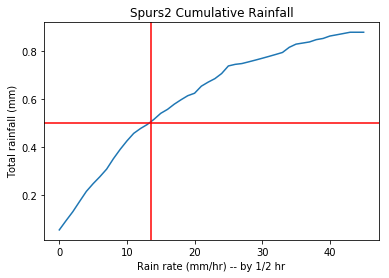

In [286]:
plt.plot(halfsum)
plt.axhline(y=.5, color='r')
plt.axvline(x=13.5, color='r')
plt.xlabel('Rain rate (mm/hr) -- by 1/2 hr')
plt.ylabel('Total rainfall (mm)')
plt.title('Spurs2 Cumulative Rainfall');

In this spurs2 set, we know there are far more rain events, especially larger ones. Thus, it is not surprising that 50% of our rainfall occurs at a much higher threshold than Spurs1, at about 6.75 mm/ hr

## Lagged Time Variables

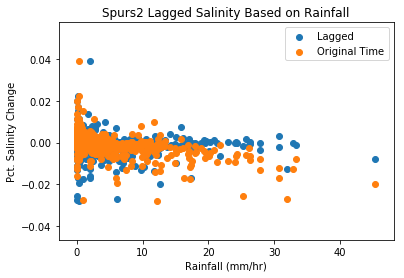

In [287]:
rain_lag2 = pd.DataFrame(rain2['precip'].reset_index().drop('new_time', axis=1))
pct_rain_lag2 = pd.DataFrame(rain2['pct_change'].reset_index().drop('new_time', axis=1).shift(1).fillna(0))
rainlagged = pd.concat([rain_lag2, pct_rain_lag2], axis=1, join='outer')
#pct_lag
plt.scatter(x=rain_lag2, y=pct_rain_lag2, label='Lagged')
plt.scatter(x=rain2['precip'], y=rain2['pct_change'], label='Original Time')
plt.xlabel('Rainfall (mm/hr)')
plt.ylabel('Pct. Salinity Change')
plt.title('Spurs2 Lagged Salinity Based on Rainfall')
plt.legend()
plt.show()

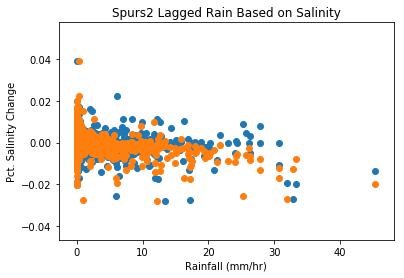

In [288]:
rainlag2 = pd.DataFrame(data2['precip'].reset_index().drop('new_time', axis=1).shift(1).fillna(0))
pct_lag2 = pd.DataFrame(data2['pct_change'].reset_index().drop('new_time', axis=1))
lagged2 = pd.concat([rainlag2, pct_lag2], axis=1, join='outer')
#pct_lag
plt.scatter(x=rainlag2, y=pct_lag2, label='Lagged')
plt.scatter(x=data2['precip'], y=data2['pct_change'], label='Original Time')
plt.xlabel('Rainfall (mm/hr)')
plt.ylabel('Pct. Salinity Change')
plt.title('Spurs2 Lagged Rain Based on Salinity')
plt.show()

In [289]:
## Lagged on Salinity Change-- did rain cause?
rainlagged.corr()

,precip,pct_change
precip,1.000000,-0.118177
pct_change,-0.118177,1.000000


In [290]:
# Lagged on rainfall-- did a salinity change cause?
lagged2.corr()

,precip,pct_change
precip,1.000000,-0.216265
pct_change,-0.216265,1.000000


In [293]:
## Same hour, when rain occurred
rain2 = data2[data2['precip'] > 0]
rain2[['precip', 'pct_change']].corr()

,precip,pct_change
precip,1.000000,-0.508551
pct_change,-0.508551,1.000000


In [166]:
# The unaltered data set
data2[['precip', 'pct_change']].corr()

,precip,pct_change
precip,1.000000,-0.429775
pct_change,-0.429775,1.000000


So again, we can conclude that there is no greater effect of salinity on rainfall (and vice versa) than when any rain actually occurs, and within the same hour.

## Other Correlations

In [148]:
## We can see that, directly, no variable has a strong correlation with rainfall here
data2.corr().sort_values(by='precip', ascending=True)

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,...,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
pct_c_scaled,-0.002945,0.035635,0.006050,0.047182,-0.004090,-0.429775,-0.248179,-0.056030,-0.005042,0.004830,...,-0.003506,0.035635,-0.004090,0.047182,0.006050,1.000000,1.000000,0.357960,0.013305,0.000787
pct_change,-0.002945,0.035635,0.006049,0.047182,-0.004090,-0.429775,-0.248179,-0.056030,-0.005041,0.004830,...,-0.003506,0.035635,-0.004090,0.047182,0.006049,1.000000,1.000000,0.357960,0.013305,0.000787
sst_pct_change,0.006947,0.024518,0.037906,-0.059160,0.011483,-0.166910,-0.137857,-0.065479,0.008026,-0.005175,...,0.363461,0.024518,0.011483,-0.059160,0.037906,0.357960,0.357960,1.000000,0.026006,-0.023019
scaled_sss,0.204595,1.000000,-0.452150,0.425725,-0.575275,-0.161124,-0.223944,-0.262578,0.623705,-0.770663,...,0.003719,1.000000,-0.575275,0.425725,-0.452150,0.035635,0.035635,0.024518,0.014290,-0.018451
sss,0.204595,1.000000,-0.452150,0.425725,-0.575275,-0.161124,-0.223944,-0.262578,0.623705,-0.770663,...,0.003719,1.000000,-0.575275,0.425725,-0.452150,0.035635,0.035635,0.024518,0.014290,-0.018451
year,0.792294,0.623705,-0.082629,0.189060,-0.282705,-0.070216,-0.092548,-0.114403,1.000000,-0.657014,...,-0.000750,0.623705,-0.282705,0.189060,-0.082629,-0.005041,-0.005042,0.008026,0.013973,0.001153
wind_spd,-0.068397,0.425725,-0.451008,1.000000,-0.302924,-0.044964,-0.059969,-0.062804,0.189060,-0.391873,...,0.006853,0.425725,-0.302924,1.000000,-0.451008,0.047182,0.047182,-0.059160,0.021393,-0.045356
scaled_spd,-0.068397,0.425725,-0.451008,1.000000,-0.302924,-0.044964,-0.059969,-0.062804,0.189060,-0.391873,...,0.006853,0.425725,-0.302924,1.000000,-0.451008,0.047182,0.047182,-0.059160,0.021393,-0.045356
day,0.021032,-0.004914,-0.001553,-0.038290,0.030036,-0.028915,-0.037566,-0.046122,-0.043480,0.010181,...,0.000956,-0.004914,0.030036,-0.038290,-0.001553,-0.002374,-0.002374,-0.004959,-0.010532,0.003852
time,1.000000,0.204595,0.243213,-0.068397,0.000386,-0.015004,-0.019691,-0.023530,0.792294,-0.063662,...,0.001014,0.204595,0.000386,-0.068397,0.243213,-0.002945,-0.002945,0.006947,0.007192,0.017249


In [152]:
rain_prev2 = data2['precip'].reset_index().drop('new_time', axis=1).shift(-1).fillna(0)
data_prev2 = data2.reset_index().drop(['new_time', 'precip'], axis=1)
data_prev2 = pd.concat([rain_prev2,data_prev2], axis=1, join='outer')


rain_lagged2 = data2['precip'].reset_index().drop('new_time', axis=1).shift(1).fillna(0)
data_lagged2 = data2.reset_index().drop(['new_time', 'precip'], axis=1)
data_lagged2 = pd.concat([rain_lagged2,data_lagged2], axis=1, join='outer')
data_lagged2.corr().sort_values(by='precip', ascending=True)

,precip,time,sss,sst,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
pct_c_scaled,-0.216265,-0.002945,0.035635,0.006050,0.047182,-0.004090,-0.248179,-0.056030,-0.005042,0.004830,...,-0.003506,0.035635,-0.004090,0.047182,0.006050,1.000000,1.000000,0.357960,0.013305,0.000787
pct_change,-0.216265,-0.002945,0.035635,0.006049,0.047182,-0.004090,-0.248179,-0.056030,-0.005041,0.004830,...,-0.003506,0.035635,-0.004090,0.047182,0.006049,1.000000,1.000000,0.357960,0.013305,0.000787
scaled_sss,-0.177340,0.204595,1.000000,-0.452150,0.425725,-0.575275,-0.223944,-0.262578,0.623705,-0.770663,...,0.003719,1.000000,-0.575275,0.425725,-0.452150,0.035635,0.035635,0.024518,0.014290,-0.018451
sss,-0.177340,0.204595,1.000000,-0.452150,0.425725,-0.575275,-0.223944,-0.262578,0.623705,-0.770663,...,0.003719,1.000000,-0.575275,0.425725,-0.452150,0.035635,0.035635,0.024518,0.014290,-0.018451
sst_pct_change,-0.123902,0.006947,0.024518,0.037906,-0.059160,0.011483,-0.137857,-0.065479,0.008026,-0.005175,...,0.363461,0.024518,0.011483,-0.059160,0.037906,0.357960,0.357960,1.000000,0.026006,-0.023019
year,-0.070216,0.792294,0.623705,-0.082629,0.189060,-0.282705,-0.092548,-0.114403,1.000000,-0.657014,...,-0.000750,0.623705,-0.282705,0.189060,-0.082629,-0.005041,-0.005042,0.008026,0.013973,0.001153
wind_spd,-0.050491,-0.068397,0.425725,-0.451008,1.000000,-0.302924,-0.059969,-0.062804,0.189060,-0.391873,...,0.006853,0.425725,-0.302924,1.000000,-0.451008,0.047182,0.047182,-0.059160,0.021393,-0.045356
scaled_spd,-0.050491,-0.068397,0.425725,-0.451008,1.000000,-0.302924,-0.059969,-0.062804,0.189060,-0.391873,...,0.006853,0.425725,-0.302924,1.000000,-0.451008,0.047182,0.047182,-0.059160,0.021393,-0.045356
day,-0.028480,0.021032,-0.004914,-0.001553,-0.038290,0.030036,-0.037566,-0.046122,-0.043480,0.010181,...,0.000956,-0.004914,0.030036,-0.038290,-0.001553,-0.002374,-0.002374,-0.004959,-0.010532,0.003852
time,-0.014940,1.000000,0.204595,0.243213,-0.068397,0.000386,-0.019691,-0.023530,0.792294,-0.063662,...,0.001014,0.204595,0.000386,-0.068397,0.243213,-0.002945,-0.002945,0.006947,0.007192,0.017249


In [153]:
data_prev2.corr().sort_values(by='precip', ascending=True)

,precip,time,sss,sst,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
pct_c_scaled,-0.136712,-0.002945,0.035635,0.006050,0.047182,-0.004090,-0.248179,-0.056030,-0.005042,0.004830,...,-0.003506,0.035635,-0.004090,0.047182,0.006050,1.000000,1.000000,0.357960,0.013305,0.000787
pct_change,-0.136712,-0.002945,0.035635,0.006049,0.047182,-0.004090,-0.248179,-0.056030,-0.005041,0.004830,...,-0.003506,0.035635,-0.004090,0.047182,0.006049,1.000000,1.000000,0.357960,0.013305,0.000787
scaled_sss,-0.128592,0.204595,1.000000,-0.452150,0.425725,-0.575275,-0.223944,-0.262578,0.623705,-0.770663,...,0.003719,1.000000,-0.575275,0.425725,-0.452150,0.035635,0.035635,0.024518,0.014290,-0.018451
sss,-0.128592,0.204595,1.000000,-0.452150,0.425725,-0.575275,-0.223944,-0.262578,0.623705,-0.770663,...,0.003719,1.000000,-0.575275,0.425725,-0.452150,0.035635,0.035635,0.024518,0.014290,-0.018451
sst_pct_change,-0.074619,0.006947,0.024518,0.037906,-0.059160,0.011483,-0.137857,-0.065479,0.008026,-0.005175,...,0.363461,0.024518,0.011483,-0.059160,0.037906,0.357960,0.357960,1.000000,0.026006,-0.023019
year,-0.070460,0.792294,0.623705,-0.082629,0.189060,-0.282705,-0.092548,-0.114403,1.000000,-0.657014,...,-0.000750,0.623705,-0.282705,0.189060,-0.082629,-0.005041,-0.005042,0.008026,0.013973,0.001153
scaled_spd,-0.039824,-0.068397,0.425725,-0.451008,1.000000,-0.302924,-0.059969,-0.062804,0.189060,-0.391873,...,0.006853,0.425725,-0.302924,1.000000,-0.451008,0.047182,0.047182,-0.059160,0.021393,-0.045356
wind_spd,-0.039824,-0.068397,0.425725,-0.451008,1.000000,-0.302924,-0.059969,-0.062804,0.189060,-0.391873,...,0.006853,0.425725,-0.302924,1.000000,-0.451008,0.047182,0.047182,-0.059160,0.021393,-0.045356
day,-0.029024,0.021032,-0.004914,-0.001553,-0.038290,0.030036,-0.037566,-0.046122,-0.043480,0.010181,...,0.000956,-0.004914,0.030036,-0.038290,-0.001553,-0.002374,-0.002374,-0.004959,-0.010532,0.003852
time,-0.015069,1.000000,0.204595,0.243213,-0.068397,0.000386,-0.019691,-0.023530,0.792294,-0.063662,...,0.001014,0.204595,0.000386,-0.068397,0.243213,-0.002945,-0.002945,0.006947,0.007192,0.017249


## Only Rain Events That Changed Salinity

In [154]:
data2.corr().sort_values(by='precip', ascending=True)

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,...,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
pct_c_scaled,-0.002945,0.035635,0.006050,0.047182,-0.004090,-0.429775,-0.248179,-0.056030,-0.005042,0.004830,...,-0.003506,0.035635,-0.004090,0.047182,0.006050,1.000000,1.000000,0.357960,0.013305,0.000787
pct_change,-0.002945,0.035635,0.006049,0.047182,-0.004090,-0.429775,-0.248179,-0.056030,-0.005041,0.004830,...,-0.003506,0.035635,-0.004090,0.047182,0.006049,1.000000,1.000000,0.357960,0.013305,0.000787
sst_pct_change,0.006947,0.024518,0.037906,-0.059160,0.011483,-0.166910,-0.137857,-0.065479,0.008026,-0.005175,...,0.363461,0.024518,0.011483,-0.059160,0.037906,0.357960,0.357960,1.000000,0.026006,-0.023019
scaled_sss,0.204595,1.000000,-0.452150,0.425725,-0.575275,-0.161124,-0.223944,-0.262578,0.623705,-0.770663,...,0.003719,1.000000,-0.575275,0.425725,-0.452150,0.035635,0.035635,0.024518,0.014290,-0.018451
sss,0.204595,1.000000,-0.452150,0.425725,-0.575275,-0.161124,-0.223944,-0.262578,0.623705,-0.770663,...,0.003719,1.000000,-0.575275,0.425725,-0.452150,0.035635,0.035635,0.024518,0.014290,-0.018451
year,0.792294,0.623705,-0.082629,0.189060,-0.282705,-0.070216,-0.092548,-0.114403,1.000000,-0.657014,...,-0.000750,0.623705,-0.282705,0.189060,-0.082629,-0.005041,-0.005042,0.008026,0.013973,0.001153
wind_spd,-0.068397,0.425725,-0.451008,1.000000,-0.302924,-0.044964,-0.059969,-0.062804,0.189060,-0.391873,...,0.006853,0.425725,-0.302924,1.000000,-0.451008,0.047182,0.047182,-0.059160,0.021393,-0.045356
scaled_spd,-0.068397,0.425725,-0.451008,1.000000,-0.302924,-0.044964,-0.059969,-0.062804,0.189060,-0.391873,...,0.006853,0.425725,-0.302924,1.000000,-0.451008,0.047182,0.047182,-0.059160,0.021393,-0.045356
day,0.021032,-0.004914,-0.001553,-0.038290,0.030036,-0.028915,-0.037566,-0.046122,-0.043480,0.010181,...,0.000956,-0.004914,0.030036,-0.038290,-0.001553,-0.002374,-0.002374,-0.004959,-0.010532,0.003852
time,1.000000,0.204595,0.243213,-0.068397,0.000386,-0.015004,-0.019691,-0.023530,0.792294,-0.063662,...,0.001014,0.204595,0.000386,-0.068397,0.243213,-0.002945,-0.002945,0.006947,0.007192,0.017249


In [161]:
wishful_thinking2 = data2[(data2['precip'] > 1e-4) & (data2['pct_change'] < 0)]
wishful_thinking2.corr().sort_values(by='precip', ascending=True)

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,...,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
pct_change,0.041033,0.445131,-0.041984,0.313121,-0.091650,-0.591575,-0.637843,-0.569691,0.128589,-0.178489,...,0.010315,0.445131,-0.091650,0.313121,-0.041984,1.000000,1.000000,0.587705,0.037814,-0.035803
pct_c_scaled,0.041033,0.445131,-0.041984,0.313121,-0.091650,-0.591575,-0.637843,-0.569691,0.128589,-0.178489,...,0.010315,0.445131,-0.091650,0.313121,-0.041984,1.000000,1.000000,0.587705,0.037814,-0.035803
sst_pct_change,0.051109,0.329382,-0.145271,0.235902,-0.066195,-0.295066,-0.356211,-0.306041,0.120191,-0.146556,...,0.145936,0.329382,-0.066195,0.235902,-0.145271,0.587705,0.587705,1.000000,0.062853,-0.049799
sss,0.235153,1.000000,-0.360072,0.297319,-0.298798,-0.279175,-0.395232,-0.396581,0.554583,-0.681386,...,-0.027229,1.000000,-0.298798,0.297319,-0.360072,0.445131,0.445131,0.329382,0.005439,0.006593
scaled_sss,0.235153,1.000000,-0.360072,0.297319,-0.298798,-0.279175,-0.395232,-0.396581,0.554583,-0.681386,...,-0.027229,1.000000,-0.298798,0.297319,-0.360072,0.445131,0.445131,0.329382,0.005439,0.006593
year,0.836123,0.554583,0.038482,0.131421,-0.139916,-0.088331,-0.094276,-0.115556,1.000000,-0.627977,...,0.000108,0.554583,-0.139916,0.131421,0.038482,0.128589,0.128589,0.120191,-0.014150,0.061330
scaled_spd,-0.011779,0.297319,-0.221532,1.000000,-0.147615,-0.063364,-0.094648,-0.079125,0.131421,-0.248548,...,0.008542,0.297319,-0.147615,1.000000,-0.221532,0.313121,0.313121,0.235902,0.062242,0.010826
wind_spd,-0.011779,0.297319,-0.221532,1.000000,-0.147615,-0.063364,-0.094648,-0.079125,0.131421,-0.248548,...,0.008542,0.297319,-0.147615,1.000000,-0.221532,0.313121,0.313121,0.235902,0.062242,0.010826
day,0.028091,0.077393,-0.008037,-0.075190,0.016041,-0.053838,-0.074042,-0.076585,-0.017767,-0.023209,...,0.046961,0.077393,0.016041,-0.075190,-0.008037,0.034455,0.034455,0.002903,0.045174,0.057666
spd_pct_change,0.068211,0.006593,0.005316,0.010826,0.017939,-0.020477,-0.000269,0.004697,0.061330,-0.020202,...,0.021305,0.006593,0.017939,0.010826,0.005316,-0.035803,-0.035803,-0.049799,0.017144,1.000000


In [158]:
more_wishful_thinking2 = data_lagged2[(data_lagged2['precip'] > 1e-4) & (data_lagged2['pct_change'] < 0)]
more_wishful_thinking2.corr().sort_values(by='precip', ascending=True)

,precip,time,sss,sst,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
pct_c_scaled,-0.476856,0.056615,0.467560,-0.022851,0.320604,-0.102873,-0.630769,-0.565534,0.152581,-0.203063,...,0.018710,0.467560,-0.102873,0.320604,-0.022851,1.000000,1.000000,0.624968,0.053428,-0.033369
pct_change,-0.476856,0.056615,0.467560,-0.022851,0.320604,-0.102873,-0.630769,-0.565534,0.152581,-0.203063,...,0.018710,0.467560,-0.102873,0.320604,-0.022851,1.000000,1.000000,0.624968,0.053428,-0.033369
sss,-0.334536,0.252143,1.000000,-0.336032,0.292305,-0.315767,-0.406726,-0.405150,0.567092,-0.685736,...,-0.009893,1.000000,-0.315767,0.292305,-0.336032,0.467560,0.467560,0.330300,0.008731,0.023703
scaled_sss,-0.334536,0.252143,1.000000,-0.336032,0.292305,-0.315767,-0.406726,-0.405150,0.567092,-0.685736,...,-0.009893,1.000000,-0.315767,0.292305,-0.336032,0.467560,0.467560,0.330300,0.008731,0.023703
sst_pct_change,-0.295061,0.041086,0.330300,-0.102005,0.238126,-0.085307,-0.360675,-0.321323,0.113545,-0.154101,...,0.177903,0.330300,-0.085307,0.238126,-0.102005,0.624968,0.624968,1.000000,0.040524,-0.061834
scaled_spd,-0.113078,-0.005162,0.292305,-0.193941,1.000000,-0.143091,-0.103495,-0.085087,0.131482,-0.238004,...,0.019308,0.292305,-0.143091,1.000000,-0.193941,0.320604,0.320604,0.238126,0.038542,0.002010
wind_spd,-0.113078,-0.005162,0.292305,-0.193941,1.000000,-0.143091,-0.103495,-0.085087,0.131482,-0.238004,...,0.019308,0.292305,-0.143091,1.000000,-0.193941,0.320604,0.320604,0.238126,0.038542,0.002010
year,-0.070515,0.838561,0.567092,0.053561,0.131482,-0.156586,-0.082909,-0.102224,1.000000,-0.636668,...,0.024687,0.567092,-0.156586,0.131482,0.053561,0.152581,0.152581,0.113545,-0.023613,0.072822
day,-0.070283,0.038178,0.076948,0.009529,-0.100033,0.021372,-0.085658,-0.083175,-0.008137,-0.026455,...,0.075310,0.076948,0.021372,-0.100033,0.009529,0.052056,0.052056,0.047101,0.030656,0.038019
sst,-0.019156,0.243335,-0.336032,1.000000,-0.193941,0.200385,-0.017390,-0.039301,0.053561,0.248944,...,-0.032556,-0.336032,0.200385,-0.193941,1.000000,-0.022851,-0.022851,-0.102005,0.017918,-0.013160


In [159]:
last_one2 = data_prev2[(data_prev2['precip'] > 1e-4) & (data_prev2['pct_change'] < 0)]
last_one2.corr().sort_values(by='precip', ascending=True)

,precip,time,sss,sst,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
pct_c_scaled,-0.184746,0.022575,0.424269,-0.010228,0.267990,-0.096945,-0.668451,-0.602192,0.111524,-0.176960,...,0.026301,0.424269,-0.096945,0.267990,-0.010228,1.000000,1.000000,0.564076,0.013668,0.008927
pct_change,-0.184746,0.022575,0.424269,-0.010228,0.267990,-0.096945,-0.668451,-0.602192,0.111524,-0.176960,...,0.026301,0.424269,-0.096945,0.267990,-0.010228,1.000000,1.000000,0.564076,0.013668,0.008927
sss,-0.160910,0.249006,1.000000,-0.330029,0.270737,-0.299597,-0.384989,-0.386032,0.560703,-0.682816,...,-0.025327,1.000000,-0.299597,0.270737,-0.330029,0.424269,0.424269,0.319543,0.019296,0.037604
scaled_sss,-0.160910,0.249006,1.000000,-0.330029,0.270737,-0.299597,-0.384989,-0.386032,0.560703,-0.682816,...,-0.025327,1.000000,-0.299597,0.270737,-0.330029,0.424269,0.424269,0.319543,0.019296,0.037604
sst_pct_change,-0.072900,0.014465,0.319543,-0.118144,0.194965,-0.024971,-0.340945,-0.301719,0.089098,-0.143918,...,0.238432,0.319543,-0.024971,0.194965,-0.118144,0.564076,0.564076,1.000000,0.045965,-0.015061
day,-0.067177,-0.007916,0.062994,-0.013642,-0.098927,0.031924,-0.066087,-0.071954,-0.047491,-0.021135,...,0.038919,0.062994,0.031924,-0.098927,-0.013642,0.035909,0.035909,-0.006565,-0.005705,0.019903
year,-0.054306,0.842858,0.560703,0.038714,0.092971,-0.123723,-0.083353,-0.109298,1.000000,-0.623607,...,-0.016277,0.560703,-0.123723,0.092971,0.038714,0.111524,0.111524,0.089098,0.021750,0.044323
spd_pct_change,-0.028838,0.037612,0.037604,0.013432,-0.066727,0.032590,-0.025822,-0.023066,0.044323,-0.029421,...,0.013837,0.037604,0.032590,-0.066727,0.013432,0.008927,0.008927,-0.015061,-0.012096,1.000000
wind_spd,-0.017988,-0.035489,0.270737,-0.205214,1.000000,-0.140721,-0.068053,-0.056242,0.092971,-0.214046,...,0.026256,0.270737,-0.140721,1.000000,-0.205214,0.267990,0.267990,0.194965,0.060025,-0.066727
scaled_spd,-0.017988,-0.035489,0.270737,-0.205214,1.000000,-0.140721,-0.068053,-0.056242,0.092971,-0.214046,...,0.026256,0.270737,-0.140721,1.000000,-0.205214,0.267990,0.267990,0.194965,0.060025,-0.066727


### Plotting It

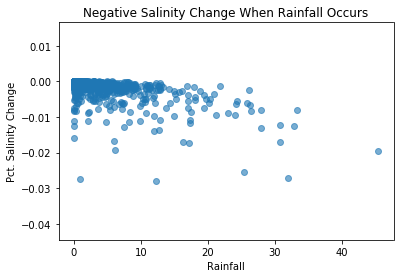

In [160]:
plt.scatter(wishful_thinking2['precip'], wishful_thinking2['pct_change'], alpha=0.6)
plt.title('Negative Salinity Change When Rainfall Occurs')
plt.xlabel('Rainfall')
plt.ylabel('Pct. Salinity Change');

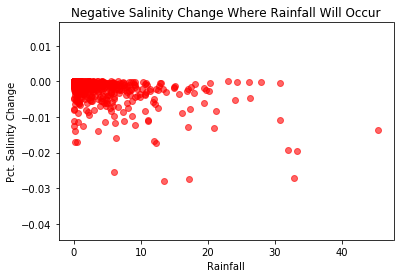

In [162]:
plt.scatter(more_wishful_thinking2['precip'], more_wishful_thinking2['pct_change'], c='red', alpha=0.6)
plt.title('Negative Salinity Change Where Rainfall Will Occur')
plt.xlabel('Rainfall')
plt.ylabel('Pct. Salinity Change');

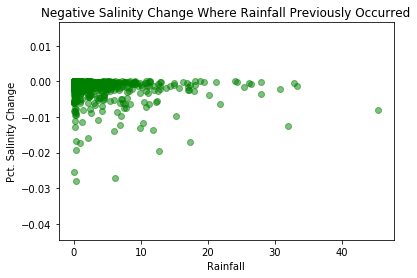

In [163]:
plt.scatter(last_one2['precip'], last_one2['pct_change'], c='green', alpha=0.5)
plt.title('Negative Salinity Change Where Rainfall Previously Occurred')
plt.xlabel('Rainfall')
plt.ylabel('Pct. Salinity Change');

## Specific Rain Events

In [164]:
## The events with the greatest negative salinity change...
top_change2 = data2[(data2['precip'] > 1e-4)].sort_values(by='pct_change', ascending=True)[:10]
top_change2.corr().sort_values(by='precip', ascending=True).style.background_gradient('RdBu_r').set_precision(3)
#top_change2

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
spd_pct_change,-0.234,0.253,-0.0443,0.164,-0.292,-0.397,-0.321,-0.378,-0.282,0.318,-0.0707,-0.175,0.253,-0.292,0.164,-0.0443,0.133,0.133,-0.0919,-0.302,1
day,0.062,0.00419,-0.418,0.286,0.0891,-0.164,-0.344,-0.364,0.00794,0.129,1,0.395,0.00419,0.0891,0.286,-0.418,0.287,0.287,0.38,0.372,-0.0707
dir_pct_change,-0.465,-0.13,0.213,0.615,0.577,-0.146,0.0188,0.0975,-0.531,0.344,0.372,0.337,-0.13,0.577,0.615,0.213,0.224,0.224,-0.16,1,-0.302
month,0.0636,0.599,-0.378,0.203,0.467,-0.0756,-0.442,-0.333,-0.1,1,0.129,0.264,0.599,0.467,0.203,-0.378,0.294,0.294,0.23,0.344,0.318
scaled_sst,-0.639,-0.263,1,0.296,0.0579,-0.0192,0.246,0.133,-0.564,-0.378,-0.418,0.0869,-0.263,0.0579,0.296,1,-0.121,-0.121,-0.474,0.213,-0.0443
sst,-0.639,-0.263,1,0.296,0.0579,-0.0192,0.246,0.133,-0.564,-0.378,-0.418,0.0869,-0.263,0.0579,0.296,1,-0.121,-0.121,-0.474,0.213,-0.0443
pct_change,0.164,0.348,-0.121,0.111,0.287,0.0703,-0.0725,-0.318,0.107,0.294,0.287,0.304,0.348,0.287,0.111,-0.121,1,1,0.72,0.224,0.133
pct_c_scaled,0.164,0.348,-0.121,0.111,0.287,0.0703,-0.0725,-0.318,0.107,0.294,0.287,0.304,0.348,0.287,0.111,-0.121,1,1,0.72,0.224,0.133
wind_spd,-0.344,-0.0794,0.296,1,0.318,0.0854,0.37,0.347,-0.385,0.203,0.286,0.49,-0.0794,0.318,1,0.296,0.111,0.111,-0.144,0.615,0.164
scaled_spd,-0.344,-0.0794,0.296,1,0.318,0.0854,0.37,0.347,-0.385,0.203,0.286,0.49,-0.0794,0.318,1,0.296,0.111,0.111,-0.144,0.615,0.164


In [165]:
low_change2 = data2[(data2['precip'] > 1e-4) & (data2['pct_change'] < 0)].sort_values(by='pct_change', ascending=False)[:10]
low_change2.corr().sort_values(by='precip', ascending=True).style.background_gradient('RdBu_r').set_precision(3)
#low_change2

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
year,0.778,0.391,0.204,0.533,0.0921,-0.747,-0.707,0.0371,1,-0.544,-0.313,-0.494,0.391,0.0921,0.533,0.204,0.0469,0.0469,-0.769,0.162,-0.554
scaled_sss,-0.109,1,-0.133,0.611,-0.857,-0.736,-0.669,-0.549,0.391,-0.774,0.191,-0.608,1,-0.857,0.611,-0.133,0.59,0.59,-0.288,-0.501,-0.436
sss,-0.109,1,-0.133,0.611,-0.857,-0.736,-0.669,-0.549,0.391,-0.774,0.191,-0.608,1,-0.857,0.611,-0.133,0.59,0.59,-0.288,-0.501,-0.436
wind_spd,0.226,0.611,-0.079,1,-0.431,-0.652,-0.804,-0.481,0.533,-0.533,-0.162,-0.51,0.611,-0.431,1,-0.079,-0.0719,-0.0719,-0.199,-0.23,-0.325
scaled_spd,0.226,0.611,-0.079,1,-0.431,-0.652,-0.804,-0.481,0.533,-0.533,-0.162,-0.51,0.611,-0.431,1,-0.079,-0.0719,-0.0719,-0.199,-0.23,-0.325
time,1,-0.109,0.139,0.226,0.522,-0.544,-0.23,0.378,0.778,0.102,-0.403,0.0905,-0.109,0.522,0.226,0.139,-0.167,-0.167,-0.527,0.0873,-0.559
pct_c_scaled,-0.167,0.59,-0.325,-0.0719,-0.563,-0.445,-0.0162,-0.0616,0.0469,-0.348,0.617,0.00583,0.59,-0.563,-0.0719,-0.325,1,1,0.00787,-0.49,-0.48
pct_change,-0.167,0.59,-0.325,-0.0719,-0.563,-0.445,-0.0162,-0.0616,0.0469,-0.348,0.617,0.00583,0.59,-0.563,-0.0719,-0.325,1,1,0.00787,-0.49,-0.48
day,-0.403,0.191,-0.184,-0.162,-0.41,0.0347,0.184,-0.268,-0.313,-0.12,1,0.281,0.191,-0.41,-0.162,-0.184,0.617,0.617,0.566,-0.127,0.0278
cum_precip6,0.378,-0.549,0.0347,-0.481,0.618,0.0973,0.572,1,0.0371,0.453,-0.268,0.349,-0.549,0.618,-0.481,0.0347,-0.0616,-0.0616,-0.279,0.148,-0.382


In [166]:
top_rain2 = data2[(data2['precip'] > 1e-4) & (data2['pct_change'] <0)].sort_values(by='precip', ascending=False)[:10]
top_rain2.corr().sort_values(by='precip', ascending=True).style.background_gradient('RdBu_r').set_precision(3)
#top_rain2

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
pct_change,-0.0477,0.796,-0.309,0.645,-0.504,-0.502,-0.761,-0.756,-0.125,0.406,0.144,0.395,0.796,-0.504,0.645,-0.309,1,1,0.825,-0.358,0.671
pct_c_scaled,-0.0477,0.796,-0.309,0.645,-0.504,-0.502,-0.761,-0.756,-0.125,0.406,0.144,0.395,0.796,-0.504,0.645,-0.309,1,1,0.825,-0.358,0.671
sss,0.0922,1,-0.417,0.8,-0.656,-0.463,-0.442,-0.44,-0.000113,0.38,0.541,0.474,1,-0.656,0.8,-0.417,0.796,0.796,0.648,-0.0642,0.405
scaled_sss,0.0922,1,-0.417,0.8,-0.656,-0.463,-0.442,-0.44,-0.000113,0.38,0.541,0.474,1,-0.656,0.8,-0.417,0.796,0.796,0.648,-0.0642,0.405
scaled_spd,-0.155,0.8,-0.0731,1,-0.505,-0.289,-0.189,-0.191,-0.19,0.201,0.0991,0.453,0.8,-0.505,1,-0.0731,0.645,0.645,0.317,-0.0303,0.696
wind_spd,-0.155,0.8,-0.0731,1,-0.505,-0.289,-0.189,-0.191,-0.19,0.201,0.0991,0.453,0.8,-0.505,1,-0.0731,0.645,0.645,0.317,-0.0303,0.696
spd_pct_change,-0.372,0.405,0.00927,0.696,-0.424,-0.275,-0.392,-0.35,-0.385,0.216,-0.36,0.144,0.405,-0.424,0.696,0.00927,0.671,0.671,0.38,-0.413,1
sst_pct_change,0.36,0.648,-0.57,0.317,-0.441,-0.229,-0.575,-0.526,0.244,0.49,0.398,0.452,0.648,-0.441,0.317,-0.57,0.825,0.825,1,-0.271,0.38
month,-0.181,0.38,-0.881,0.201,-0.202,-0.143,-0.279,-0.293,-0.371,1,0.425,0.341,0.38,-0.202,0.201,-0.881,0.406,0.406,0.49,-0.237,0.216
day,0.52,0.541,-0.713,0.0991,-0.406,0.043,0.0943,0.0869,0.389,0.425,1,0.364,0.541,-0.406,0.0991,-0.713,0.144,0.144,0.398,0.15,-0.36


In [167]:
low_rain2 = data2[(data2['precip'] > 1e-4) & (data2['pct_change'] < 0)].sort_values(by='precip', ascending=True)[:10]
low_rain2.corr().sort_values(by='precip', ascending=True).style.background_gradient('RdBu_r').set_precision(3)
#low_rain2

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
day,-0.478,-0.65,-0.0806,-0.49,0.595,-0.423,0.0312,-0.0385,-0.662,0.715,1,0.325,-0.65,0.595,-0.49,-0.0806,-0.537,-0.537,-0.123,0.057,0.022
pct_change,0.655,0.414,0.127,0.265,-0.274,-0.24,0.0218,0.0758,0.665,-0.545,-0.537,0.27,0.414,-0.274,0.265,0.127,1,1,0.36,-0.257,0.0401
pct_c_scaled,0.655,0.414,0.127,0.265,-0.274,-0.24,0.0218,0.0758,0.665,-0.545,-0.537,0.27,0.414,-0.274,0.265,0.127,1,1,0.36,-0.257,0.0401
hour,0.408,0.051,0.182,0.135,0.465,-0.22,0.0606,0.00729,0.147,0.171,0.325,1,0.051,0.465,0.135,0.182,0.27,0.27,0.677,-0.414,0.0901
sst,0.35,-0.201,1,0.27,-0.167,-0.156,0.198,0.118,0.339,-0.283,-0.0806,0.182,-0.201,-0.167,0.27,1,0.127,0.127,0.129,-0.129,0.262
scaled_sst,0.35,-0.201,1,0.27,-0.167,-0.156,0.198,0.118,0.339,-0.283,-0.0806,0.182,-0.201,-0.167,0.27,1,0.127,0.127,0.129,-0.129,0.262
sst_pct_change,0.263,0.26,0.129,0.155,0.234,-0.0899,-0.245,-0.232,0.229,-0.149,-0.123,0.677,0.26,0.234,0.155,0.129,0.36,0.36,1,-0.514,-0.204
month,-0.7,-0.563,-0.283,-0.738,0.634,-0.0779,0.0231,-0.106,-0.905,1,0.715,0.171,-0.563,0.634,-0.738,-0.283,-0.545,-0.545,-0.149,0.367,-0.173
dir_pct_change,-0.485,-0.141,-0.129,-0.326,-0.463,-0.0779,0.116,0.0786,-0.455,0.367,0.057,-0.414,-0.141,-0.463,-0.326,-0.129,-0.257,-0.257,-0.514,1,-0.0768
scaled_sss,0.443,1,-0.201,0.483,-0.501,0.0511,-0.25,-0.167,0.553,-0.563,-0.65,0.051,1,-0.501,0.483,-0.201,0.414,0.414,0.26,-0.141,-0.157


In [170]:
top_wind2 = data2[(data2['precip'] > 1e-4) & (data2['pct_change'] < 0)].sort_values(by='wind_spd', ascending=False)[:10]
top_wind2.corr().sort_values(by='precip', ascending=True).style.background_gradient('RdBu_r').set_precision(3)
#top_wind

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
hour,-0.385,-0.144,-0.167,-0.21,-0.0552,-0.329,-0.401,-0.417,-0.44,0.152,0.069,1,-0.144,-0.0552,-0.21,-0.167,-0.0418,-0.0418,-0.58,-0.415,0.419
sss,-0.192,1,-0.685,-0.477,-0.951,-0.317,-0.279,-0.258,0.567,-0.982,0.0771,-0.144,1,-0.951,-0.477,-0.685,-0.274,-0.274,0.271,-0.186,-0.292
scaled_sss,-0.192,1,-0.685,-0.477,-0.951,-0.317,-0.279,-0.258,0.567,-0.982,0.0771,-0.144,1,-0.951,-0.477,-0.685,-0.274,-0.274,0.271,-0.186,-0.292
pct_c_scaled,0.241,-0.274,0.403,-0.0533,0.335,-0.22,-0.115,-0.0472,-0.0679,0.41,-0.735,-0.0418,-0.274,0.335,-0.0533,0.403,1,1,0.427,0.0745,-0.0439
pct_change,0.241,-0.274,0.403,-0.0533,0.335,-0.22,-0.115,-0.0472,-0.0679,0.41,-0.735,-0.0418,-0.274,0.335,-0.0533,0.403,1,1,0.427,0.0745,-0.0439
year,0.694,0.567,0.181,-0.0314,-0.315,-0.159,0.1,0.133,1,-0.583,0.257,-0.44,0.567,-0.315,-0.0314,0.181,-0.0679,-0.0679,0.8,0.0237,-0.939
dir_pct_change,0.208,-0.186,0.28,0.0396,0.231,-0.107,-0.108,-0.123,0.0237,0.205,-0.0333,-0.415,-0.186,0.231,0.0396,0.28,0.0745,0.0745,0.0772,1,-0.0651
sst_pct_change,0.742,0.271,0.398,0.25,-0.00437,0.00254,0.269,0.322,0.8,-0.23,-0.192,-0.58,0.271,-0.00437,0.25,0.398,0.427,0.427,1,0.0772,-0.798
day,0.148,0.0771,-0.0337,0.0212,-0.0186,0.0086,0.0702,0.0512,0.257,-0.247,1,0.069,0.0771,-0.0186,0.0212,-0.0337,-0.735,-0.735,-0.192,-0.0333,-0.205
time,1,-0.192,0.831,0.342,0.444,0.0271,0.299,0.323,0.694,0.178,0.148,-0.385,-0.192,0.444,0.342,0.831,0.241,0.241,0.742,0.208,-0.87


In [171]:
low_wind2 = data2[(data2['precip'] > 1e-4) & (data2['pct_change'] < 0)].sort_values(by='wind_spd', ascending=True)[:10]
low_wind2.corr().sort_values(by='precip', ascending=True).style.background_gradient('RdBu_r').set_precision(3)
#top_wind

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
spd_pct_change,-0.173,0.0116,-0.0872,0.044,-0.0901,-0.462,-0.368,-0.387,-0.372,0.422,0.0198,0.397,0.0116,-0.0901,0.044,-0.0872,0.0458,0.0458,0.832,0.303,1
pct_change,0.404,0.432,0.143,-0.258,-0.178,-0.384,0.178,0.265,0.508,-0.408,0.659,0.0102,0.432,-0.178,-0.258,0.143,1,1,0.188,-0.297,0.0458
pct_c_scaled,0.404,0.432,0.143,-0.258,-0.178,-0.384,0.178,0.265,0.508,-0.408,0.659,0.0102,0.432,-0.178,-0.258,0.143,1,1,0.188,-0.297,0.0458
day,-0.0201,0.742,-0.13,-0.141,-0.123,-0.32,0.033,0.162,0.293,-0.621,1,0.372,0.742,-0.123,-0.141,-0.13,0.659,0.659,0.372,-0.0526,0.0198
sst_pct_change,-0.308,0.308,-0.028,-0.238,-0.371,-0.296,-0.231,-0.23,-0.399,0.262,0.372,0.611,0.308,-0.371,-0.238,-0.028,0.188,0.188,1,0.179,0.832
sss,-0.143,1,-0.385,-0.387,0.286,-0.226,-0.285,-0.167,0.256,-0.697,0.742,0.211,1,0.286,-0.387,-0.385,0.432,0.432,0.308,0.00455,0.0116
scaled_sss,-0.143,1,-0.385,-0.387,0.286,-0.226,-0.285,-0.167,0.256,-0.697,0.742,0.211,1,0.286,-0.387,-0.385,0.432,0.432,0.308,0.00455,0.0116
wind_spd,0.325,-0.387,0.169,1,-0.0104,-0.16,-0.135,-0.182,0.14,0.194,-0.141,-0.33,-0.387,-0.0104,1,0.169,-0.258,-0.258,-0.238,-0.263,0.044
scaled_spd,0.325,-0.387,0.169,1,-0.0104,-0.16,-0.135,-0.182,0.14,0.194,-0.141,-0.33,-0.387,-0.0104,1,0.169,-0.258,-0.258,-0.238,-0.263,0.044
hour,-0.341,0.211,0.19,-0.33,-0.219,-0.0865,0.0407,0.0314,-0.334,0.105,0.372,1,0.211,-0.219,-0.33,0.19,0.0102,0.0102,0.611,0.519,0.397


# Other Data Sets

## NTAS Set

In [294]:
ntas = pd.read_csv('ntas.csv')
ntas = ntas.set_index('new_time')
print(ntas['precip'].sum())
ntas.head()

365.16062089206594


,time,sss,sst,wind_spd,mld,precip,cum_precip6,cum_precip3
new_time,,,,,,,,
2001-03-31 01:00:00.000028800,730941.041667,36.224918,25.322590,7.257993,42.888125,0.0,0.0,0.0
2001-03-31 01:59:59.999971200,730941.083333,36.225780,25.307935,7.517357,42.881045,0.0,0.0,0.0
2001-03-31 03:00:00.000000000,730941.125000,36.227262,25.307050,7.063114,42.873965,0.0,0.0,0.0
2001-03-31 04:00:00.000028800,730941.166667,36.227101,25.300624,6.655590,42.866885,0.0,0.0,0.0
2001-03-31 04:59:59.999971200,730941.208333,36.227896,25.291787,7.105266,42.859806,0.0,0.0,0.0


In [295]:
ntas[['precip', 'cum_precip3']].describe()

,precip,cum_precip3
count,8169.000000,8169.000000
mean,0.044701,0.134102
std,0.430652,0.872563
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,15.928774,18.802948


In [296]:
large = ntas[ntas['precip'] > 15]
print('Substantive rainfall:', large['precip'].sum(), 'mm over', large['precip'].count(), 'events')
small = ntas[(ntas['precip'] > 0) & (ntas['precip'] < .21)]
print('Marginal rainfall:', small['precip'].sum(), 'mm over', small['precip'].count(), 'events')
other = ntas[(ntas['precip'] > .21) & (ntas['precip'] <= 2)]
print('Rainfall:', other['precip'].sum(), 'mm over', other['precip'].count(), 'events')

Substantive rainfall: 15.928773879325464 mm over 1 events
Marginal rainfall: 21.84174295095084 mm over 358 events
Rainfall: 118.08693571022722 mm over 183 events


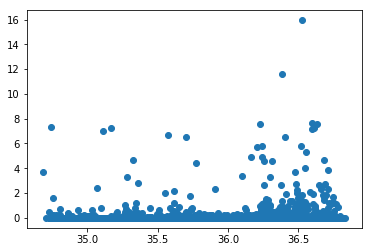

In [297]:
plt.scatter(x=ntas['sss'], y=ntas['precip'])

So here, there are very few instances of any rainfall over 8 mm in an hour.

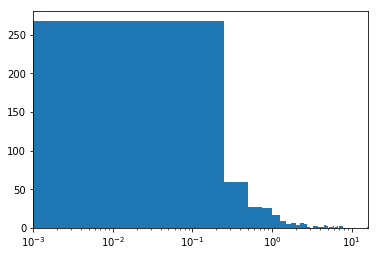

In [298]:
#plt.hist(data['precip'], bins=np.arange(0.01,0.2,0.01))
#plt.xlim([0.01,0.21])
(n, bins, patches) = plt.hist(ntas['precip'], bins=np.arange(0.001,16.251,0.25))
plt.xlim([0.001,16.001])
#plt.hist(data['precip'], bins=np.arange(15,35,3))
plt.xscale('log')
plt.show()
bin_centers = bins[0:64] + 0.125
#bin_centers
#print(a)

In [299]:
n.shape

(64,)

[33.768 22.56  16.902 22.776 19.142 12.384  8.13  11.256  8.504 14.256
 13.13   2.876  0.    10.128  7.252  3.876  4.126  4.376 18.504  9.752
  0.     5.376  5.626 11.752  0.     6.376 13.252  0.    21.378 14.752
 22.878  0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.    11.626  0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.    15.876]


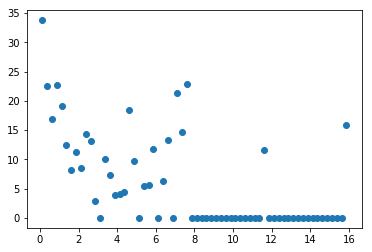

In [300]:
sums = n*bin_centers
print(sums)
plt.scatter(x=bin_centers, y=sums)

So here, there are very few large values that occur just once.

In [301]:
sums.cumsum()

array([ 33.768,  56.328,  73.23 ,  96.006, 115.148, 127.532, 135.662,
       146.918, 155.422, 169.678, 182.808, 185.684, 185.684, 195.812,
       203.064, 206.94 , 211.066, 215.442, 233.946, 243.698, 243.698,
       249.074, 254.7  , 266.452, 266.452, 272.828, 286.08 , 286.08 ,
       307.458, 322.21 , 345.088, 345.088, 345.088, 345.088, 345.088,
       345.088, 345.088, 345.088, 345.088, 345.088, 345.088, 345.088,
       345.088, 345.088, 345.088, 345.088, 356.714, 356.714, 356.714,
       356.714, 356.714, 356.714, 356.714, 356.714, 356.714, 356.714,
       356.714, 356.714, 356.714, 356.714, 356.714, 356.714, 356.714,
       372.59 ])

And again, we see that this is a valid reflection of the actual summed rainfall for the NTAS buoy

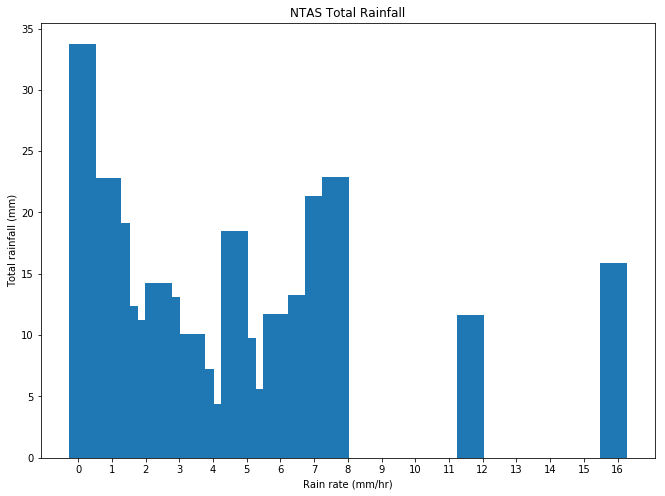

In [302]:
_, ax = plt.subplots(figsize=(11,8))
plt.bar(x=bin_centers, height=sums)
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('NTAS Total Rainfall')
plt.xticks(np.arange(0,17,1));

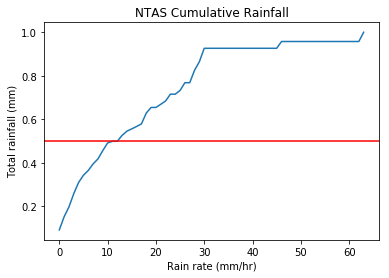

In [303]:
fullsum = sums.cumsum()/sums.sum()
halfsum = (sums.cumsum()/sums.sum())[:33]
plt.plot(fullsum)
plt.axhline(y=.5, color='r')
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('NTAS Cumulative Rainfall');

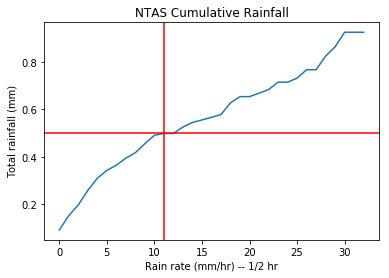

In [304]:
plt.plot(halfsum)
plt.axhline(y=.5, color='r')
plt.axvline(x=11, color='r')
plt.xlabel('Rain rate (mm/hr) -- 1/2 hr')
plt.ylabel('Total rainfall (mm)')
plt.title('NTAS Cumulative Rainfall');

In this set, about half of all rainfall occurs below 5.5 millimeters, which we could probably have assumed by the small amount of larger rain events.

In [305]:
ntas['pct_change'] = ntas['sss'].pct_change().fillna(0)

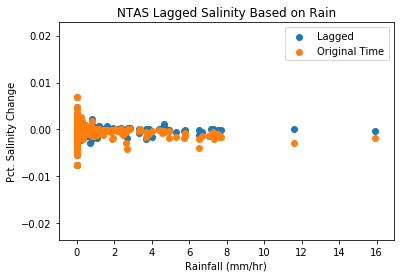

In [306]:
ntaslag2 = pd.DataFrame(ntas['precip'].reset_index().drop('new_time', axis=1))
npct_lag2 = pd.DataFrame(ntas['pct_change'].reset_index().drop('new_time', axis=1).shift(1).fillna(0))
nlag1 = pd.concat([ntaslag2, npct_lag2], axis=1, join='outer')
#pct_lag
plt.scatter(x=ntaslag2, y=npct_lag2, label='Lagged')
plt.scatter(x=ntas['precip'], y=ntas['pct_change'], label='Original Time')
plt.xlabel('Rainfall (mm/hr)')
plt.ylabel('Pct. Salinity Change')
plt.title('NTAS Lagged Salinity Based on Rain')
plt.legend()
plt.show()

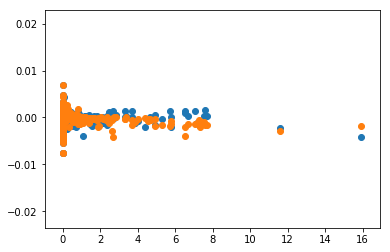

In [176]:
ntaslag2 = pd.DataFrame(ntas['precip'].reset_index().drop('new_time', axis=1).shift(1).fillna(0))
npct_lag2 = pd.DataFrame(ntas['pct_change'].reset_index().drop('new_time', axis=1))
nlag2 = pd.concat([ntaslag2, npct_lag2], axis=1, join='outer')
#pct_lag
plt.scatter(x=ntaslag2, y=npct_lag2)
plt.scatter(x=ntas['precip'], y=ntas['pct_change'])
plt.show()

In [172]:
## Correlation between lagged salinity and rainfall-- does salinity change cause rainfall here?
nlag1.corr()

,precip,pct_change
precip,1.000000,-0.037957
pct_change,-0.037957,1.000000


In [177]:
nlag2.corr()

,precip,pct_change
precip,1.000000,-0.094261
pct_change,-0.094261,1.000000


In [112]:
## For just rain events, at 
ntas_rain[['precip', 'pct_change']].corr()

,precip,pct_change
precip,1.000000,-0.558027
pct_change,-0.558027,1.000000


In [167]:
ntas[['precip', 'pct_change']].corr()

,precip,pct_change
precip,1.000000,-0.223184
pct_change,-0.223184,1.000000


This is an interesting set of correlations, as once again the strongest is when rain occurs and within the same hour. However, it is remarkable to note how low the correlation with a lagged time frame is here, with -0.04 and -0.09 lagged on salinity and rain, respectively.

## WHOTS Set

In [246]:
whots = pd.read_csv('whots.csv')
whots = whots.set_index('new_time')
print(whots['precip'].sum())
whots.head()

899.9853937686307


,time,sss,sst,wind_spd,mld,precip,cum_precip6,cum_precip3
new_time,,,,,,,,
2004-08-13 04:00:00.000028800,732172.166667,34.825873,26.888086,7.918918,38.233802,0.000000,0.0,0.000000
2004-08-13 04:59:59.999971200,732172.208333,34.824762,26.865158,7.506199,38.236220,0.000000,0.0,0.000000
2004-08-13 06:00:00.000000000,732172.250000,34.825625,26.856876,8.299770,38.238638,0.000000,0.0,0.000000
2004-08-13 07:00:00.000028800,732172.291667,34.826258,26.842372,8.377580,38.241056,0.000000,0.0,0.000000
2004-08-13 07:59:59.999971200,732172.333333,34.825453,26.828082,8.759666,38.243474,0.350616,0.0,0.350616


In [247]:
whots['precip'].describe()

count    8317.000000
mean        0.108210
std         1.288135
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        58.250181
Name: precip, dtype: float64

In [248]:
large = whots[whots['precip'] > 15]
print('Substantive rainfall:', large['precip'].sum(), 'mm over' ,large['precip'].count(), 'events')
small = whots[(whots['precip'] > 0) & (whots['precip'] < .21)]
print('Marginal rainfall:', small['precip'].sum(), 'mm over', small['precip'].count(), 'events')
other = whots[(whots['precip'] > .21) & (whots['precip'] < 2)]
print('Normal rainfall:', other['precip'].sum(), 'mm over', other['precip'].count(), 'events')


Substantive rainfall: 329.8583652542303 mm over 12 events
Marginal rainfall: 30.75673068121871 mm over 324 events
Normal rainfall: 188.21578865681337 mm over 307 events


So here we see that there are a whopping 12 rain events greater than 15 mm per hour, and that they make up almost 330 millimeters. This is a giant gap compared to the very small rain events.

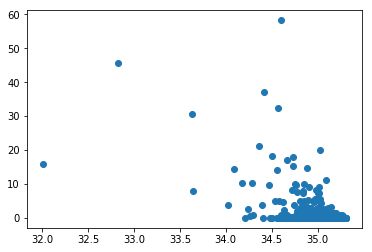

In [249]:
plt.scatter(x=whots['sss'], y=whots['precip'])

This is an interesting plot; we see that there is not much variability in salinity for most of the set, but where there is noticeable difference there is always a rain event.

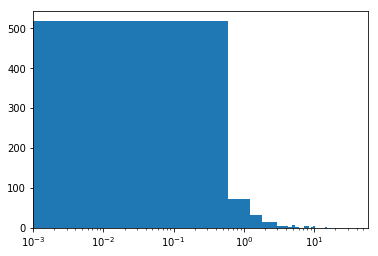

In [250]:
#plt.hist(data['precip'], bins=np.arange(0.01,0.2,0.01))
#plt.xlim([0.01,0.21])
(n, bins, patches) = plt.hist(whots['precip'], bins=np.arange(0.001,59.21,0.6))
plt.xlim([0.001,58.001])
#plt.hist(data['precip'], bins=np.arange(15,35,3))
plt.xscale('log')
plt.show()
bin_centers = bins[0:98] + 0.3
#bin_centers
#print(a)

[156.219  64.872  49.533  33.616  43.216  13.204  15.604  13.503  35.707
  17.103   0.      0.     30.004  32.404   0.     18.602  49.505  10.501
  11.101   0.      0.      0.      0.     14.101  29.402  15.301  15.901
   0.     17.101  17.701  18.301   0.      0.     20.101   0.     21.301
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.     30.301   0.      0.      0.
  32.701   0.      0.      0.      0.      0.      0.      0.     37.501
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.     45.901   0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.     58.501]


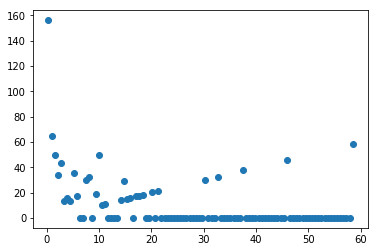

In [251]:
sums = n*bin_centers
print(sums)
plt.scatter(x=bin_centers, y=sums)

In [252]:
sums.cumsum()

array([156.219, 221.091, 270.624, 304.24 , 347.456, 360.66 , 376.264,
       389.767, 425.474, 442.577, 442.577, 442.577, 472.581, 504.985,
       504.985, 523.587, 573.092, 583.593, 594.694, 594.694, 594.694,
       594.694, 594.694, 608.795, 638.197, 653.498, 669.399, 669.399,
       686.5  , 704.201, 722.502, 722.502, 722.502, 742.603, 742.603,
       763.904, 763.904, 763.904, 763.904, 763.904, 763.904, 763.904,
       763.904, 763.904, 763.904, 763.904, 763.904, 763.904, 763.904,
       763.904, 794.205, 794.205, 794.205, 794.205, 826.906, 826.906,
       826.906, 826.906, 826.906, 826.906, 826.906, 826.906, 864.407,
       864.407, 864.407, 864.407, 864.407, 864.407, 864.407, 864.407,
       864.407, 864.407, 864.407, 864.407, 864.407, 864.407, 910.308,
       910.308, 910.308, 910.308, 910.308, 910.308, 910.308, 910.308,
       910.308, 910.308, 910.308, 910.308, 910.308, 910.308, 910.308,
       910.308, 910.308, 910.308, 910.308, 910.308, 910.308, 968.809])

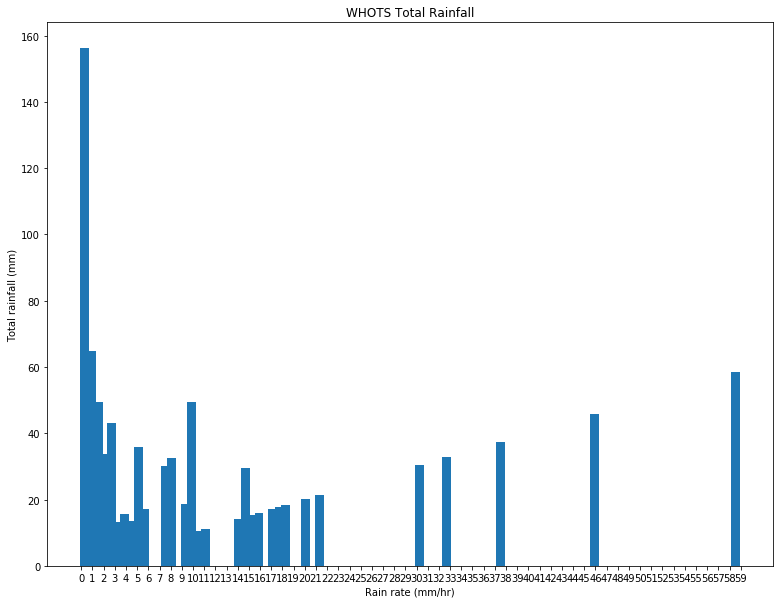

In [253]:
_, ax = plt.subplots(figsize=(13,10))
plt.bar(x=bin_centers, height=sums)
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('WHOTS Total Rainfall')
plt.xticks(np.arange(0,60,1));

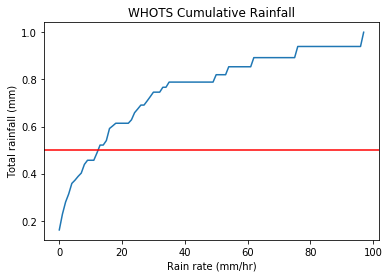

In [254]:
fullsum = sums.cumsum()/sums.sum()
halfsum = (sums.cumsum()/sums.sum())[:50]
plt.plot(fullsum)
plt.axhline(y=.5, color='r')
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('WHOTS Cumulative Rainfall');

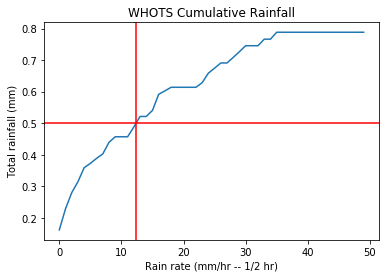

In [255]:
plt.plot(halfsum)
plt.axhline(y=.5, color='r')
plt.axvline(x=12.3, color='r')
plt.xlabel('Rain rate (mm/hr -- 1/2 hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('WHOTS Cumulative Rainfall');

In [258]:
fullsum

array([0.1612485 , 0.22820907, 0.27933679, 0.31403507, 0.35864242,
       0.37227152, 0.38837789, 0.40231563, 0.43917222, 0.45682586,
       0.45682586, 0.45682586, 0.48779584, 0.52124309, 0.52124309,
       0.54044399, 0.59154281, 0.60238189, 0.61384029, 0.61384029,
       0.61384029, 0.61384029, 0.61384029, 0.62839528, 0.65874388,
       0.6745375 , 0.69095044, 0.69095044, 0.70860201, 0.72687289,
       0.7457631 , 0.7457631 , 0.7457631 , 0.76651125, 0.76651125,
       0.78849804, 0.78849804, 0.78849804, 0.78849804, 0.78849804,
       0.78849804, 0.78849804, 0.78849804, 0.78849804, 0.78849804,
       0.78849804, 0.78849804, 0.78849804, 0.78849804, 0.78849804,
       0.81977459, 0.81977459, 0.81977459, 0.81977459, 0.8535284 ,
       0.8535284 , 0.8535284 , 0.8535284 , 0.8535284 , 0.8535284 ,
       0.8535284 , 0.8535284 , 0.89223676, 0.89223676, 0.89223676,
       0.89223676, 0.89223676, 0.89223676, 0.89223676, 0.89223676,
       0.89223676, 0.89223676, 0.89223676, 0.89223676, 0.89223

Surprisingly enough, even with the huge variability and amount of large rain events, the 50% mark of total cumulative rainfall still lies around 6.15 millimeters/hr, which is similar to everything else we've seen.

In [257]:
## One thought
print('First cumulative third of rainfall:', fullsum[fullsum<0.33].shape)
print('From the first to the second cumul. third:', fullsum[(fullsum >0.33) & (fullsum < .66)].shape)
print('Significant rain events:', fullsum[fullsum > 0.66].shape)

First cumulative third of rainfall: (4,)
From the first to the second cumul. third: (21,)
Significant rain events: (73,)


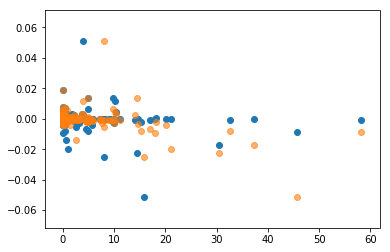

In [179]:
whots['pct_change'] = whots['sss'].pct_change().fillna(0)
whotslag = pd.DataFrame(whots['precip'].reset_index().drop('new_time', axis=1))
wpct_lag = pd.DataFrame(whots['pct_change'].reset_index().drop('new_time', axis=1).shift(1).fillna(0))
wlag = pd.concat([whotslag, wpct_lag], axis=1, join='outer')
plt.scatter(x=whotslag, y=wpct_lag)
plt.scatter(x=whots['precip'], y=whots['pct_change'], alpha=0.6)
plt.show()

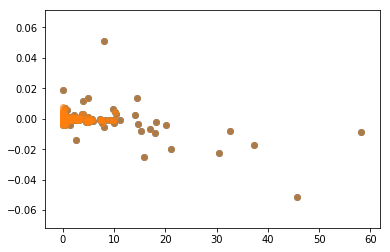

In [181]:
whots_rain = whots[whots['precip'] > 0]
whotslag2 = pd.DataFrame(whots_rain['precip'].reset_index().drop('new_time', axis=1))
wpct_lag2 = pd.DataFrame(whots_rain['pct_change'].reset_index().drop('new_time', axis=1))
w_nolag2 = pd.concat([whotslag2, wpct_lag2], axis=1, join='outer')
#pct_lag
plt.scatter(x=whotslag2, y=wpct_lag2)
plt.scatter(x=whots['precip'], y=whots['pct_change'], alpha=0.6)
plt.show()

In [182]:
w_nolag2.corr()

,precip,pct_change
precip,1.000000,-0.475307
pct_change,-0.475307,1.000000


In [183]:
wlag.corr()

,precip,pct_change
precip,1.000000,-0.171184
pct_change,-0.171184,1.000000


In [184]:
whots[['precip', 'pct_change']].corr()

,precip,pct_change
precip,1.000000,-0.453891
pct_change,-0.453891,1.000000


Finally, we see once again that there is a weak correlation between a lagged variable and rainfall. The strongest correlation is between sss and precipitation in the same hour, and again there is an even stronger correlation between rainfall and salinity in the same hour when rainfall was present. This is a trend for every single buoy, and so we should conclude that lagged variables are probably not what we want to inspect, at least not as a one-variable response. Instead, it appears that any change in salinity due to rainfall (or vice versa) would either be a quick and temporary change due to the rainfall, or an event caused by a sudden change in salinity.

# Conclusions (for now)

In [206]:
## Looking at the distributions of 50% accumulation of rainfall for buoys...
dist = np.array([5.5,6.75,5.5,6.15])
print(np.mean(dist))
print(np.std(dist))

5.975
0.5202163011671204


We can draw three main conclusions from what we've done here:

1) There does not seem to be any hard evidence that putting a time lag on either salinity or rainfall gives a better casual relationship between the two; the best correlations that we see occur within the same hour, and we see an even stronger relationship with every single buoy between the two when rain is present, which makes sense.

2) Each buoy has a relatively different threshold at which 50% of all of it's rainfall has occurred, in terms of rates of rainfall by hour. The more tropical buoys, such as Spurs2 and WHOTS, have a much larger threshold, especially Spurs2; thus, comparing what we classify as a rain event at one buoy may not necessarily be appropriate for another.

3) We see bimodal distributions of rainfall for every single rate, at every single buoy. That is, there are large amounts of very minor rain events, very few at the (relative) middle range for each buoy, and then larger representation for more significant rain events. This is true even in sparse rain climates such as NTAS and Spurs1.

__Thoughts:__ Maybe coming up with a method of classification that does not have to be hard coded, for each third of that area's total annual rainfall per rainfall rate in mm/hr. Therefore, we would have four categories: No Rain, Minor Rain, Rain, Significant Rain; our reasoning behind this is that each of these categories has drastically different representation between each buoy, but they do also all follow the same bimodal trend. Therefore, we believe this to be a reasonable outline of rain classes moving forward.

In [245]:
## One thought
print('First cumulative third of rainfall:', fullsum[fullsum<0.33].shape)
print('From the first to the second cumul. third:', fullsum[(fullsum >0.33) & (fullsum < .66)].shape)
print('Significant rain events:', fullsum[fullsum > 0.66].shape)

First cumulative third of rainfall: (4,)
From the first to the second cumul. third: (21,)
Significant rain events: (73,)
